# Modelo de Aprendizaje Automático para DataSet Boston House Prediction Price
## por Emiliano Lopez Filippini
## fuente de dataset www.kagle.com

### Comentario: El objetivo del trabajo es poner en produccion el modelo en una api. El foco principal es conectar el modelo a una pagina web para poder predecir el precio de una vivienda dada ciertas caracteristicas seleccionadas como principales para la mejor performance del modelo. No obstante, el foco del trabajo no estuvo en mejorar el modelo y bajar el MSE.
web del deploy: 

In [168]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk


In [169]:
""" Informacion de los features del dataset: SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale"""

"SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nOverallQual: Overall material and finish quality\nOverallCond: Overall condition rating\nYearBuilt: Original construction date\nYearRemodAdd: Remodel date\nRoofStyle: Type of roof\nRoofMatl: Roof material\nExterior1st: Exterior covering on house\nE

In [170]:
routpc="C:/Users/BUCEFALO/Desktop/Trabajos Data/Mlops/BostonHousePricing/"
routnb="C:/Users/emi87/OneDrive/Escritorio/Data Projects/Ml Projects/BostonHousePricing/"

In [171]:
df = pd.read_csv(routpc+"/train.csv")
dftest = pd.read_csv(routpc+"test.csv")


In [172]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [173]:
dftest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

# Análisis Descriptivo :





# - Información del Set de Datos









In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [175]:
# Existen 1460 registros y 80 variables.

In [176]:
numbercolumns=df.select_dtypes(exclude="object").columns

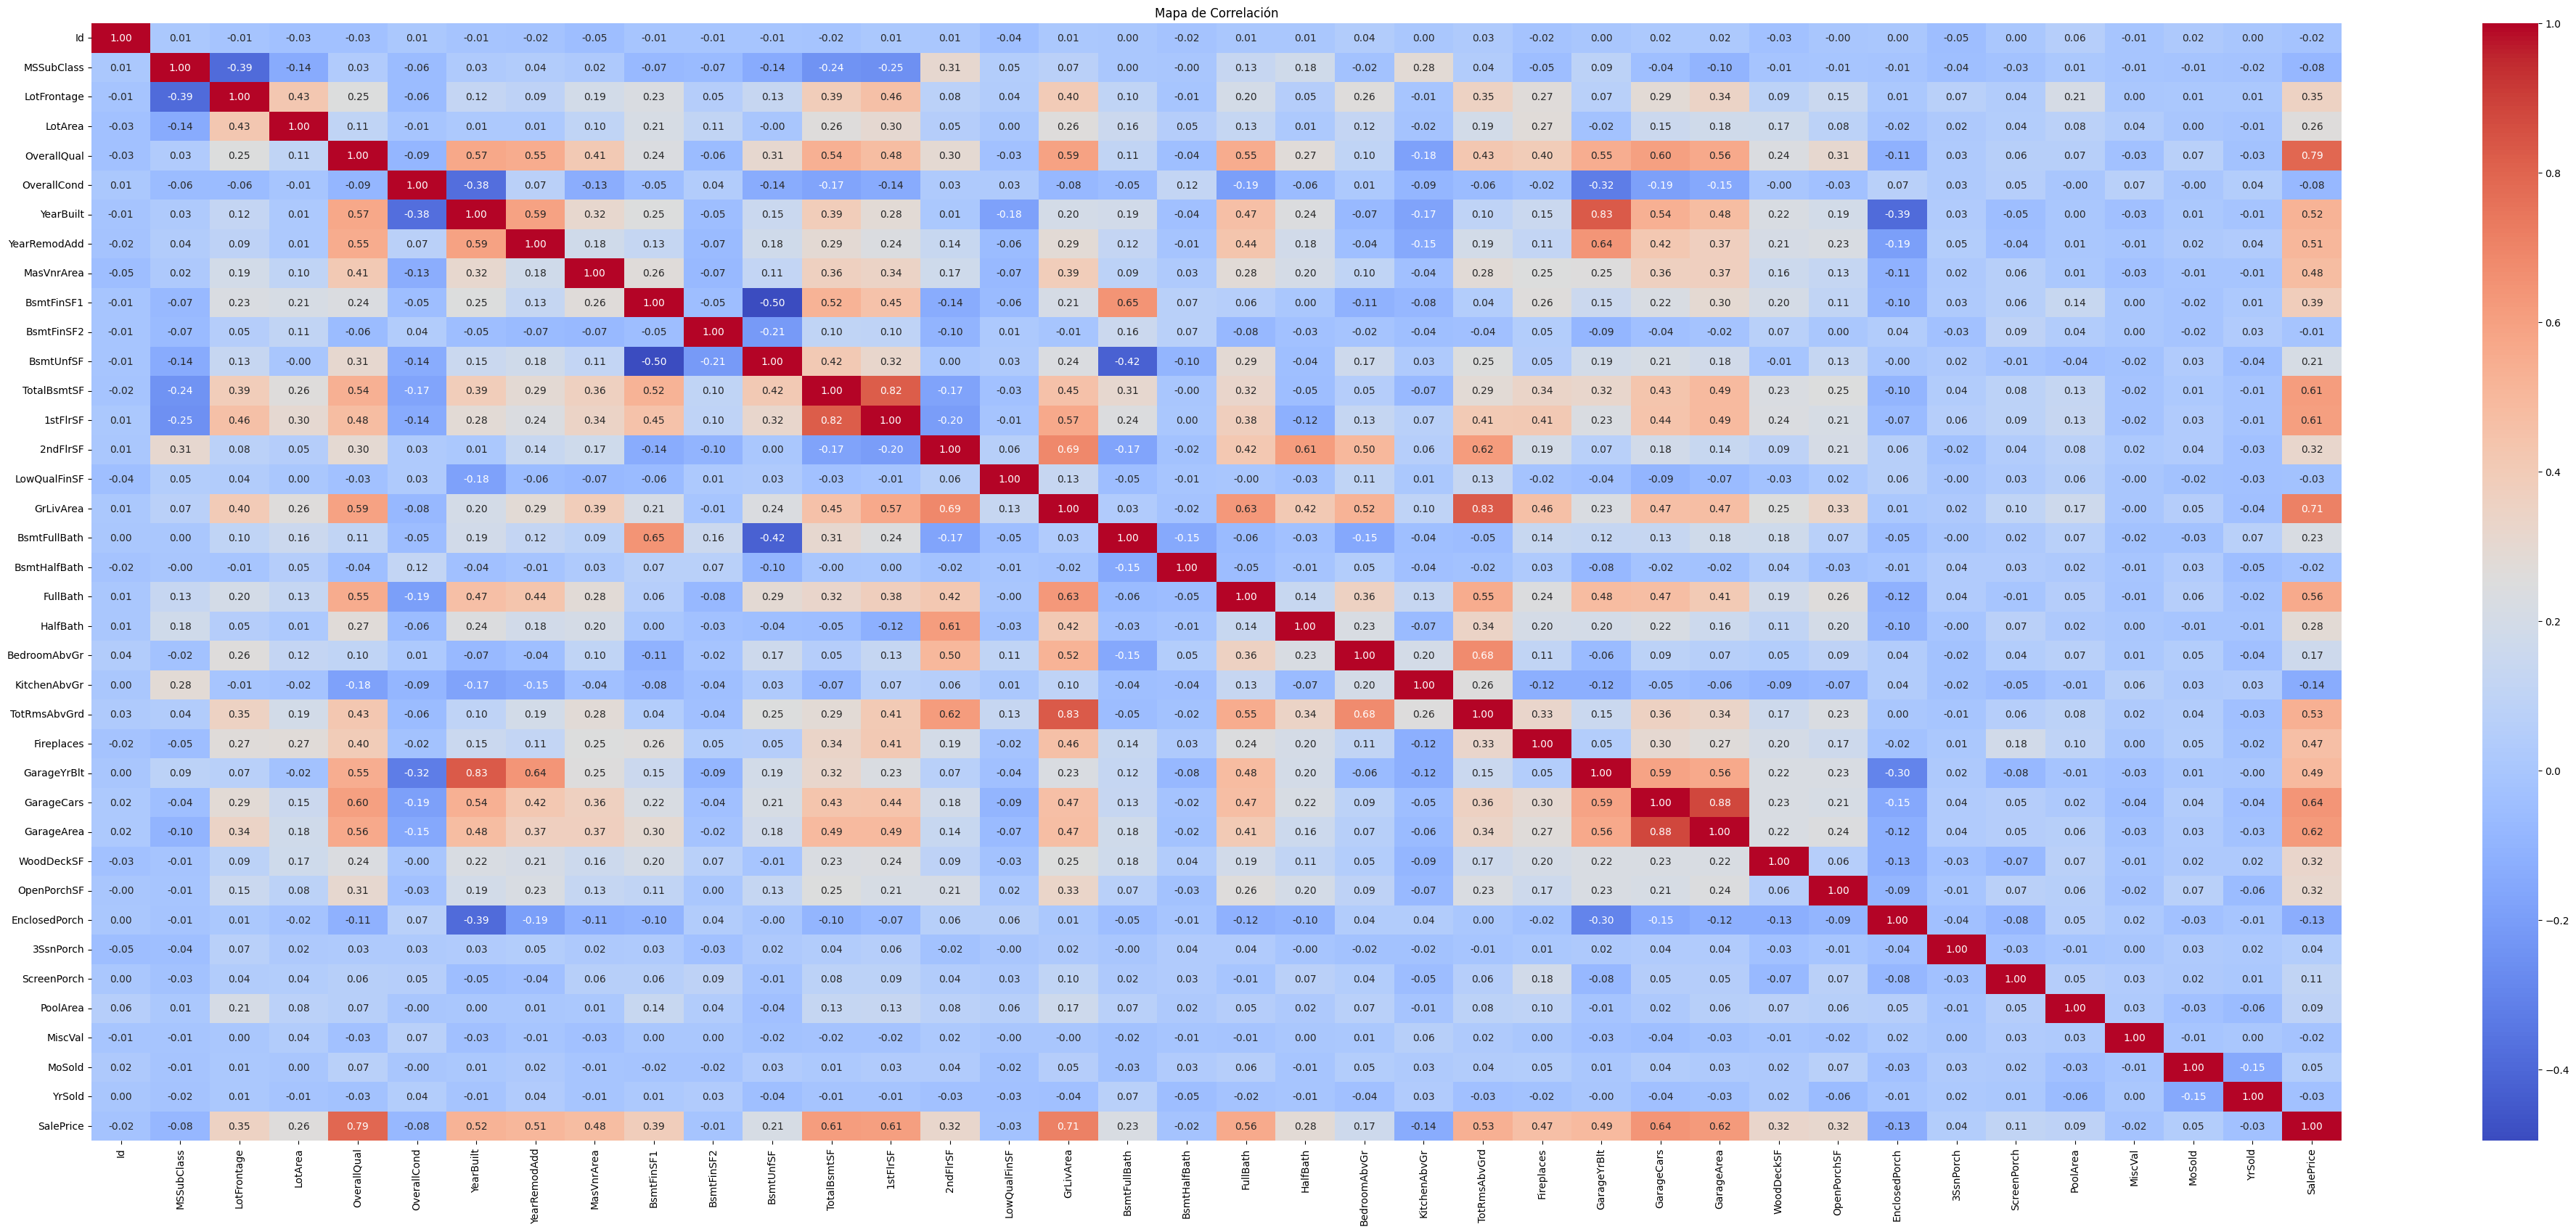

In [177]:
correlation_matrix = df[numbercolumns].corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()

In [178]:
#Overall Quality, Garage Area and GrLiveArea son las variables que tienen una alta correlación.

#- Verificación de Valores Nulos y eliminación:



In [179]:
for columnas in df.columns:
  if df[columnas].isnull().sum() > 1:
    print(f'{columnas} tiene {df[columnas].isnull().sum()} valores nulos')

LotFrontage tiene 259 valores nulos
Alley tiene 1369 valores nulos
MasVnrType tiene 872 valores nulos
MasVnrArea tiene 8 valores nulos
BsmtQual tiene 37 valores nulos
BsmtCond tiene 37 valores nulos
BsmtExposure tiene 38 valores nulos
BsmtFinType1 tiene 37 valores nulos
BsmtFinType2 tiene 38 valores nulos
FireplaceQu tiene 690 valores nulos
GarageType tiene 81 valores nulos
GarageYrBlt tiene 81 valores nulos
GarageFinish tiene 81 valores nulos
GarageQual tiene 81 valores nulos
GarageCond tiene 81 valores nulos
PoolQC tiene 1453 valores nulos
Fence tiene 1179 valores nulos
MiscFeature tiene 1406 valores nulos


#- Analisis descriptivo


In [180]:
round(df.describe()).T

count      mean      std      min       25%       50%  \
Id             1460.0     730.0    422.0      1.0     366.0     730.0   
MSSubClass     1460.0      57.0     42.0     20.0      20.0      50.0   
LotFrontage    1201.0      70.0     24.0     21.0      59.0      69.0   
LotArea        1460.0   10517.0   9981.0   1300.0    7554.0    9478.0   
OverallQual    1460.0       6.0      1.0      1.0       5.0       6.0   
OverallCond    1460.0       6.0      1.0      1.0       5.0       5.0   
YearBuilt      1460.0    1971.0     30.0   1872.0    1954.0    1973.0   
YearRemodAdd   1460.0    1985.0     21.0   1950.0    1967.0    1994.0   
MasVnrArea     1452.0     104.0    181.0      0.0       0.0       0.0   
BsmtFinSF1     1460.0     444.0    456.0      0.0       0.0     384.0   
BsmtFinSF2     1460.0      47.0    161.0      0.0       0.0       0.0   
BsmtUnfSF      1460.0     567.0    442.0      0.0     223.0     478.0   
TotalBsmtSF    1460.0    1057.0    439.0      0.0     796.0     992.0   
1stFlrSF       1460.0    1163.0    387.0    334.0     882.0    1087.0   
2ndFlrSF       1460.0     347.0    437.0      0.0       0.0       0.0   
LowQualFinSF   1460.0       6.0     49.0      0.0       0.0       0.0   
GrLivArea      1460.0    1515.0    525.0    334.0    1130.0    1464.0   
BsmtFullBath   1460.0       0.0      1.0      0.0       0.0       0.0   
BsmtHalfBath   1460.0       0.0      0.0      0.0       0.0       0.0   
FullBath       1460.0       2.0      1.0      0.0       1.0       2.0   
HalfBath       1460.0       0.0      1.0      0.0       0.0       0.0   
BedroomAbvGr   1460.0       3.0      1.0      0.0       2.0       3.0   
KitchenAbvGr   1460.0       1.0      0.0      0.0       1.0       1.0   
TotRmsAbvGrd   1460.0       7.0      2.0      2.0       5.0       6.0   
Fireplaces     1460.0       1.0      1.0      0.0       0.0       1.0   
GarageYrBlt    1379.0    1979.0     25.0   1900.0    1961.0    1980.0   
GarageCars     1460.0       2.0      1.0      0.0       1.0       2.0   
GarageArea     1460.0     473.0    214.0      0.0     334.0     480.0   
WoodDeckSF     1460.0      94.0    125.0      0.0       0.0       0.0   
OpenPorchSF    1460.0      47.0     66.0      0.0       0.0      25.0   
EnclosedPorch  1460.0      22.0     61.0      0.0       0.0       0.0   
3SsnPorch      1460.0       3.0     29.0      0.0       0.0       0.0   
ScreenPorch    1460.0      15.0     56.0      0.0       0.0       0.0   
PoolArea       1460.0       3.0     40.0      0.0       0.0       0.0   
MiscVal        1460.0      43.0    496.0      0.0       0.0       0.0   
MoSold         1460.0       6.0      3.0      1.0       5.0       6.0   
YrSold         1460.0    2008.0      1.0   2006.0    2007.0    2008.0   
SalePrice      1460.0  180921.0  79443.0  34900.0  129975.0  163000.0   

                    75%       max  
Id               1095.0    1460.0  
MSSubClass         70.0     190.0  
LotFrontage        80.0     313.0  
LotArea         11602.0  215245.0  
OverallQual         7.0      10.0  
OverallCond         6.0       9.0  
YearBuilt        2000.0    2010.0  
YearRemodAdd     2004.0    2010.0  
MasVnrArea        166.0    1600.0  
BsmtFinSF1        712.0    5644.0  
BsmtFinSF2          0.0    1474.0  
BsmtUnfSF         808.0    2336.0  
TotalBsmtSF      1298.0    6110.0  
1stFlrSF         1391.0    4692.0  
2ndFlrSF          728.0    2065.0  
LowQualFinSF        0.0     572.0  
GrLivArea        1777.0    5642.0  
BsmtFullBath        1.0       3.0  
BsmtHalfBath        0.0       2.0  
FullBath            2.0       3.0  
HalfBath            1.0       2.0  
BedroomAbvGr        3.0       8.0  
KitchenAbvGr        1.0       3.0  
TotRmsAbvGrd        7.0      14.0  
Fireplaces          1.0       3.0  
GarageYrBlt      2002.0    2010.0  
GarageCars          2.0       4.0  
GarageArea        576.0    1418.0  
WoodDeckSF        168.0     857.0  
OpenPorchSF        68.0     547.0  
EnclosedPorch       0.0     552.0  
3SsnPorch       

In [181]:
(df["ScreenPorch"]==0).sum()

1344

In [182]:
#Descripcion de las columnas con valores categóricos
variable = round(df.describe(include=['O'])).T

In [183]:
variable

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [184]:
# variable["Porc"] = variable["freq"]/len(df)

In [185]:
# variable["Porc"] = variable["Porc"].apply(lambda x: round(x,2))

In [186]:
# categoricalToDelete = [valores for valores in variable.index if variable.loc[valores, "count"] < 700] # Al haber variables categoricas con pocos datos creo una categoria para eliminarlas.


# División de Variables Categoricas, Numéricas (discretas y continuas)


In [187]:
variables_categoricas = [columnas for columnas in df.columns if df[columnas].dtype =="O"]

In [188]:
variables_numericas = [columnas for columnas in df.columns if df[columnas].dtype !="O" and len(df[columnas].unique())>20 ]

In [189]:
variables_discretas = [columnas for columnas in variables_numericas if len(df[columnas].unique()) < 20]

In [190]:
variables_temporales = [columna for columna in df.columns if 'Year' in columna or "Yr" in columna]


<Axes: xlabel='GrLivArea', ylabel='Count'>

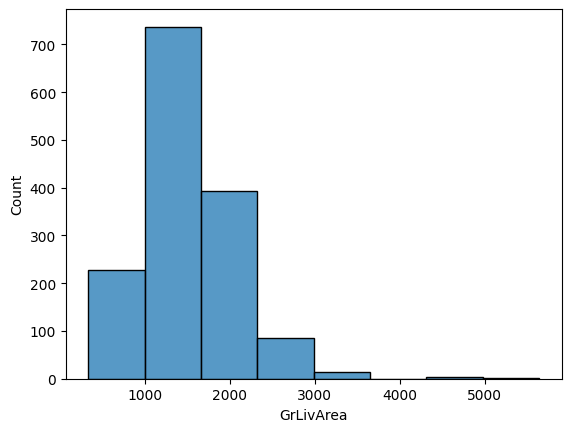

In [191]:
sns.histplot(x=df["GrLivArea"], bins = 8)

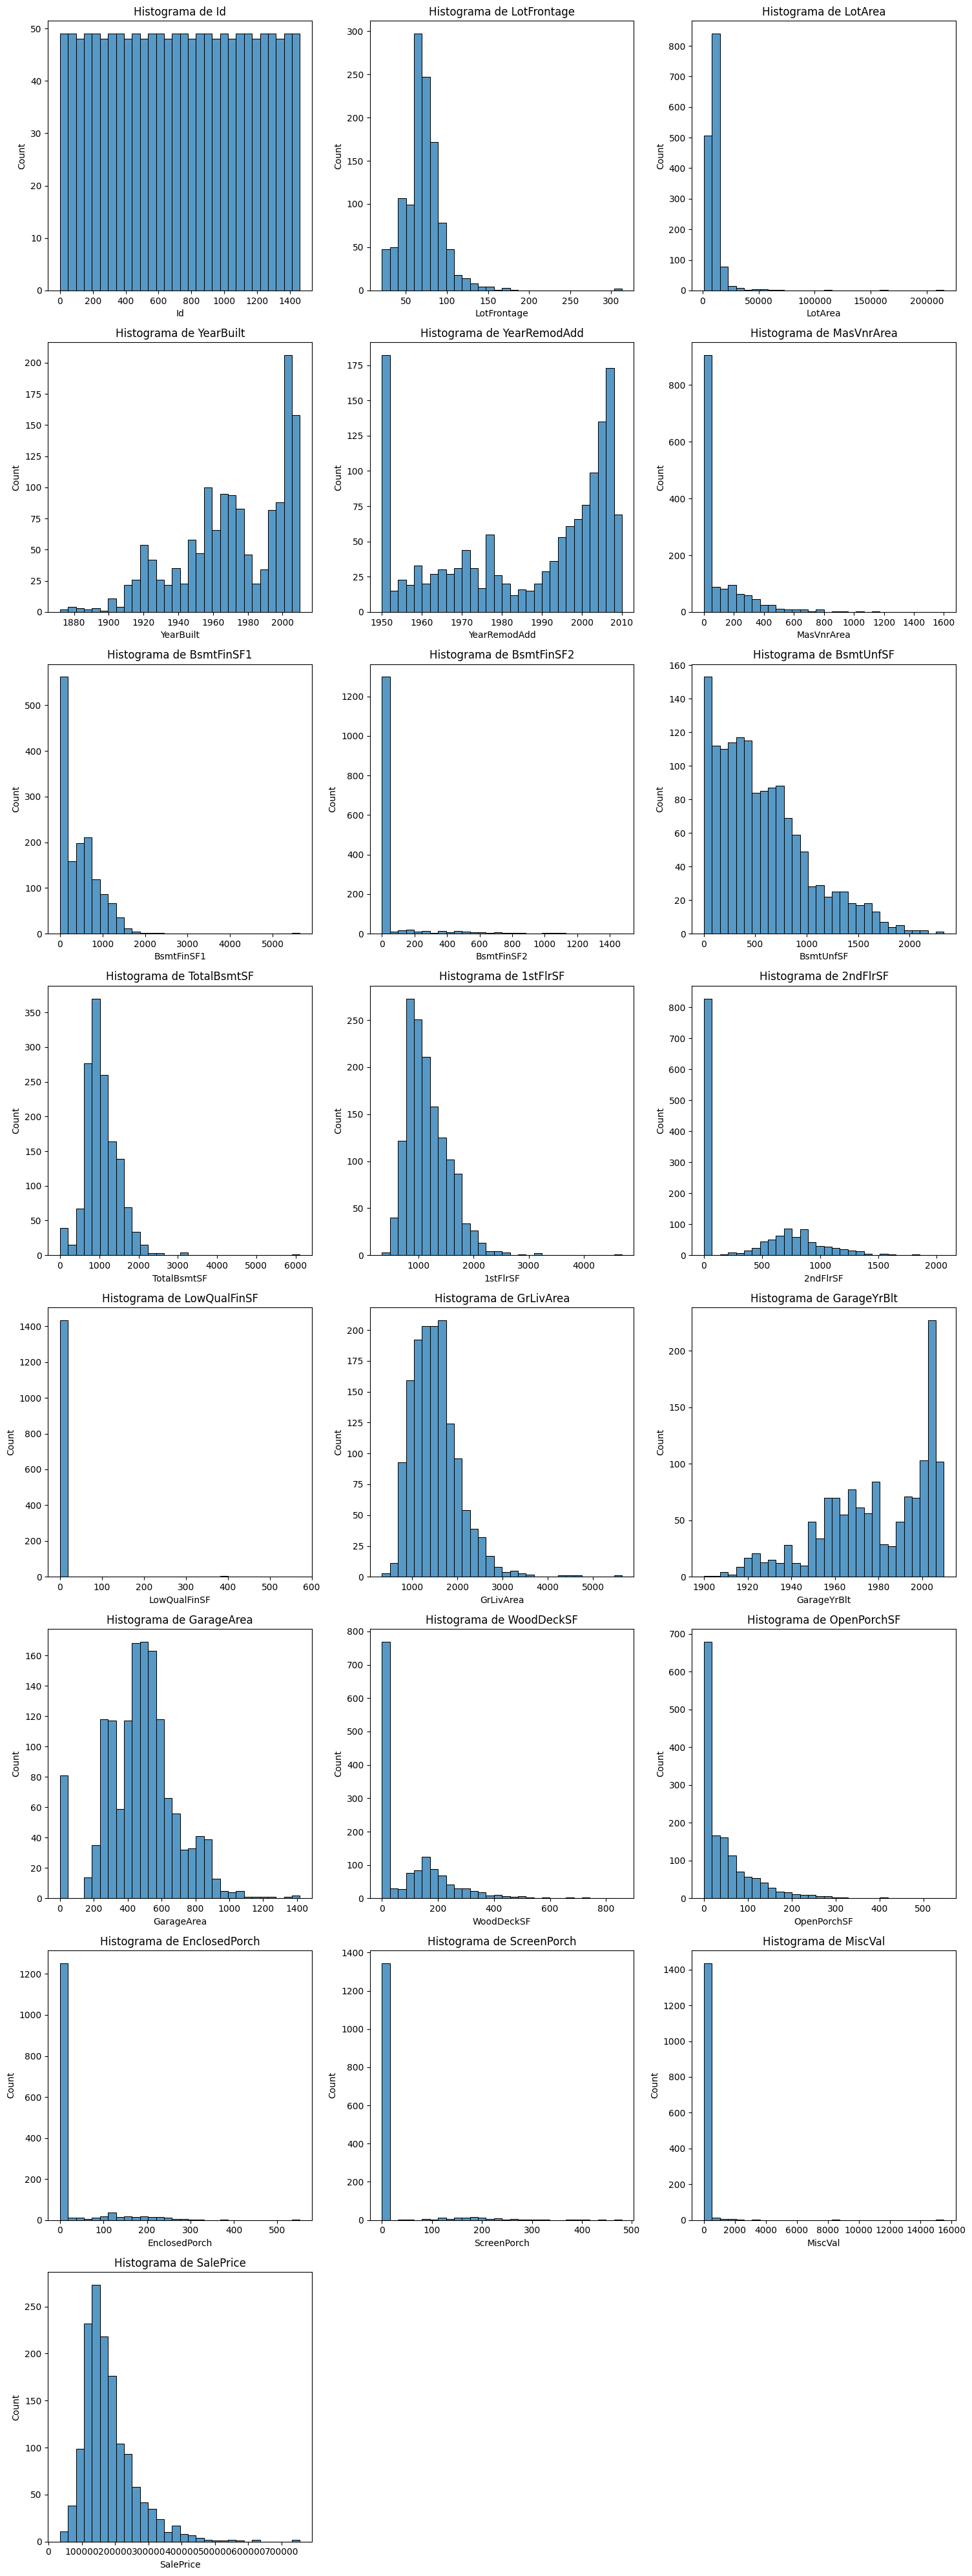

In [192]:
num_variables = len(variables_numericas) ## esto se va a usar para hacer los subplots para saber las columnas
num_filas = (num_variables + 2) // 3  # Redondeo hacia arriba de la división entera

fig, axes = plt.subplots(num_filas, 3, figsize=(15, num_filas*5))  # Crear un arreglo de subgráficos
for i, variable in enumerate(variables_numericas):

    fila_actual = i // 3
    columna_actual = i % 3

    data = df.copy()  # Hacer una copia del DataFrame original
    x = data[variable]

    sns.histplot(x=x, bins=30, ax=axes[fila_actual, columna_actual])
    axes[fila_actual, columna_actual].set_title(f'Histograma de {variable}')


for i in range(num_variables, num_filas*3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

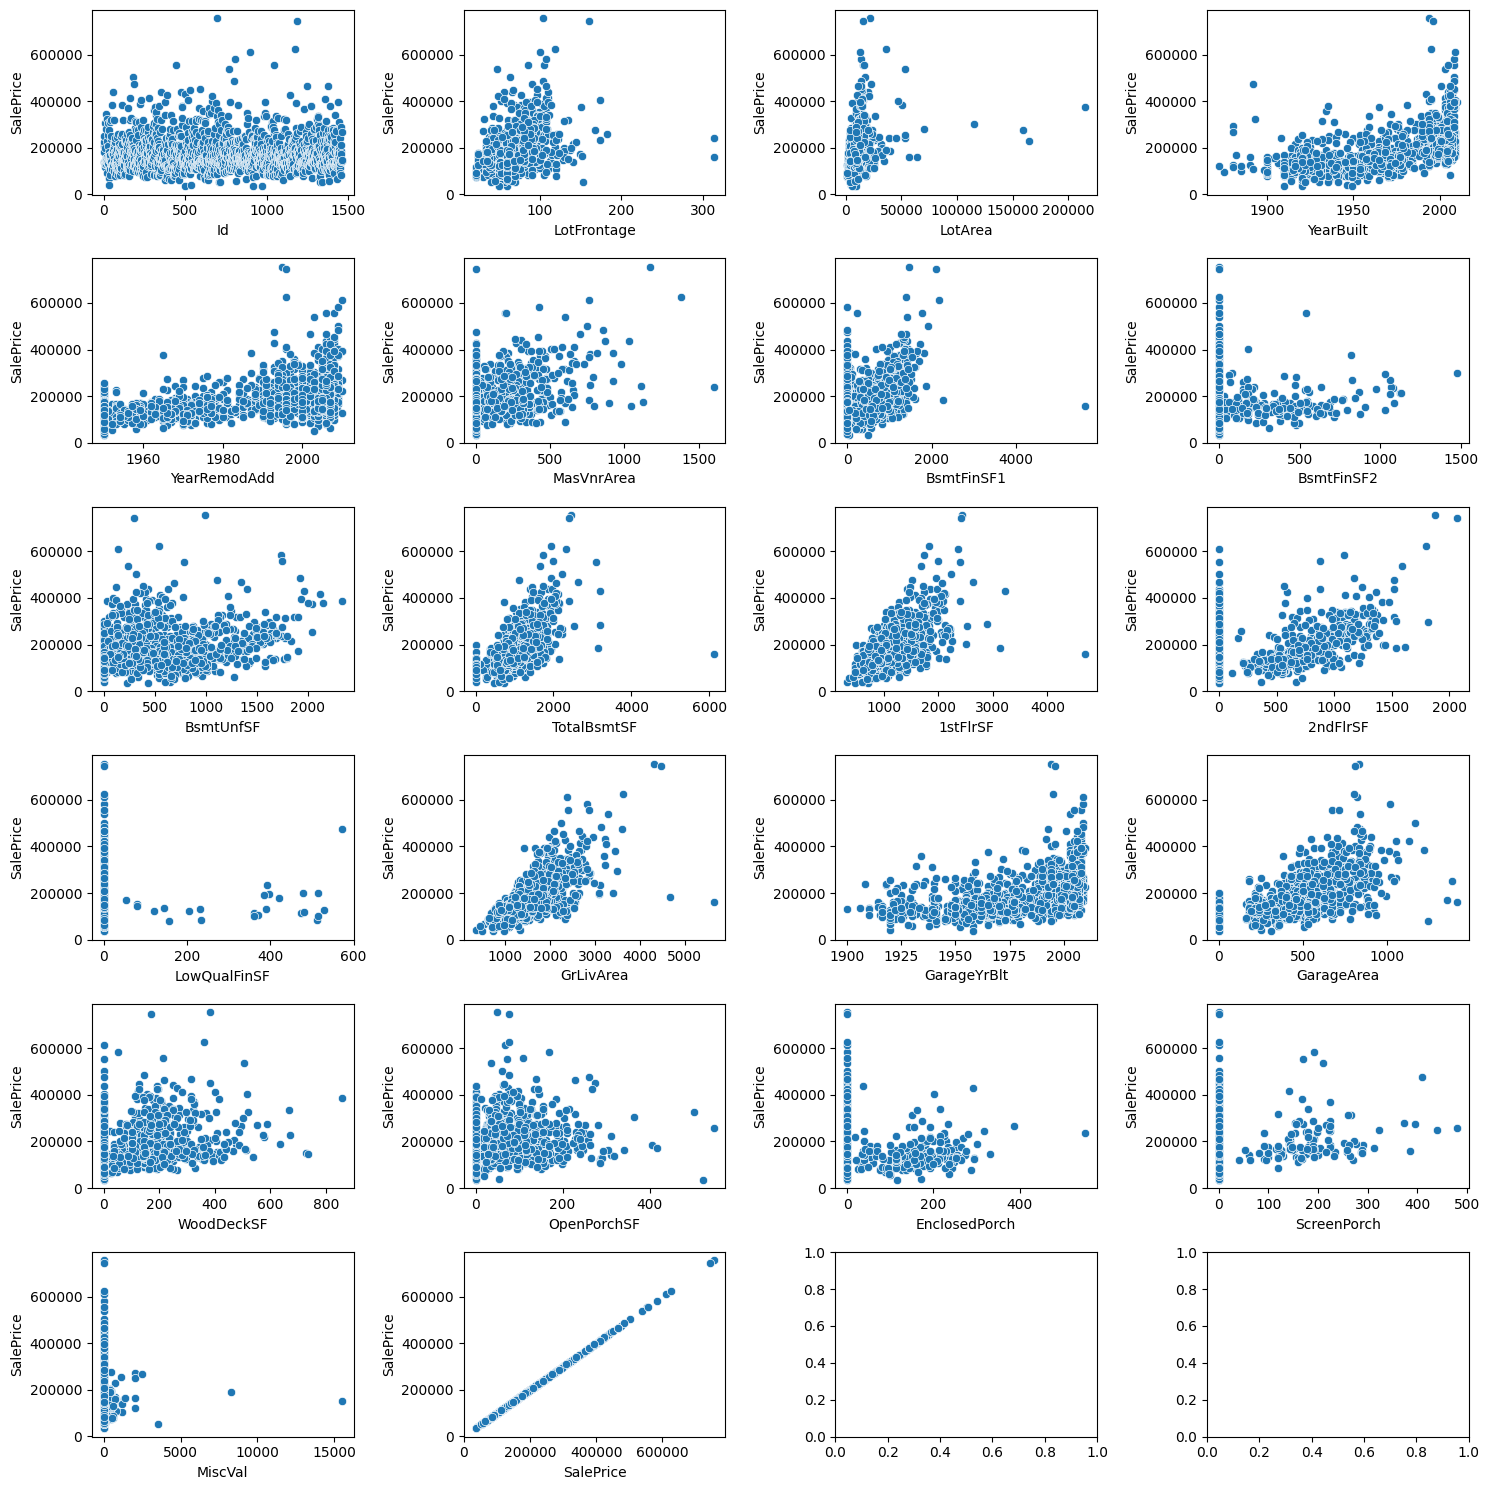

In [193]:
variables = len(variables_numericas)
filas = (variables+3)//4

# Preparacion del gráfico:
fig,axes = plt.subplots(filas,4, figsize=(15,15))

#Iterador de graficos:
for i,columnas in enumerate(variables_numericas):
  data=df.copy()
  filadata = i//4
  coldata = i % 4
  sns.scatterplot(x=data[columnas], y= data["SalePrice"], ax=axes[filadata,coldata])
  plt.tight_layout()
for i in range(variables, filas+3):
  fig.delaxes(ax.flatten()[i])
plt.show()

# Análisis De Outliers


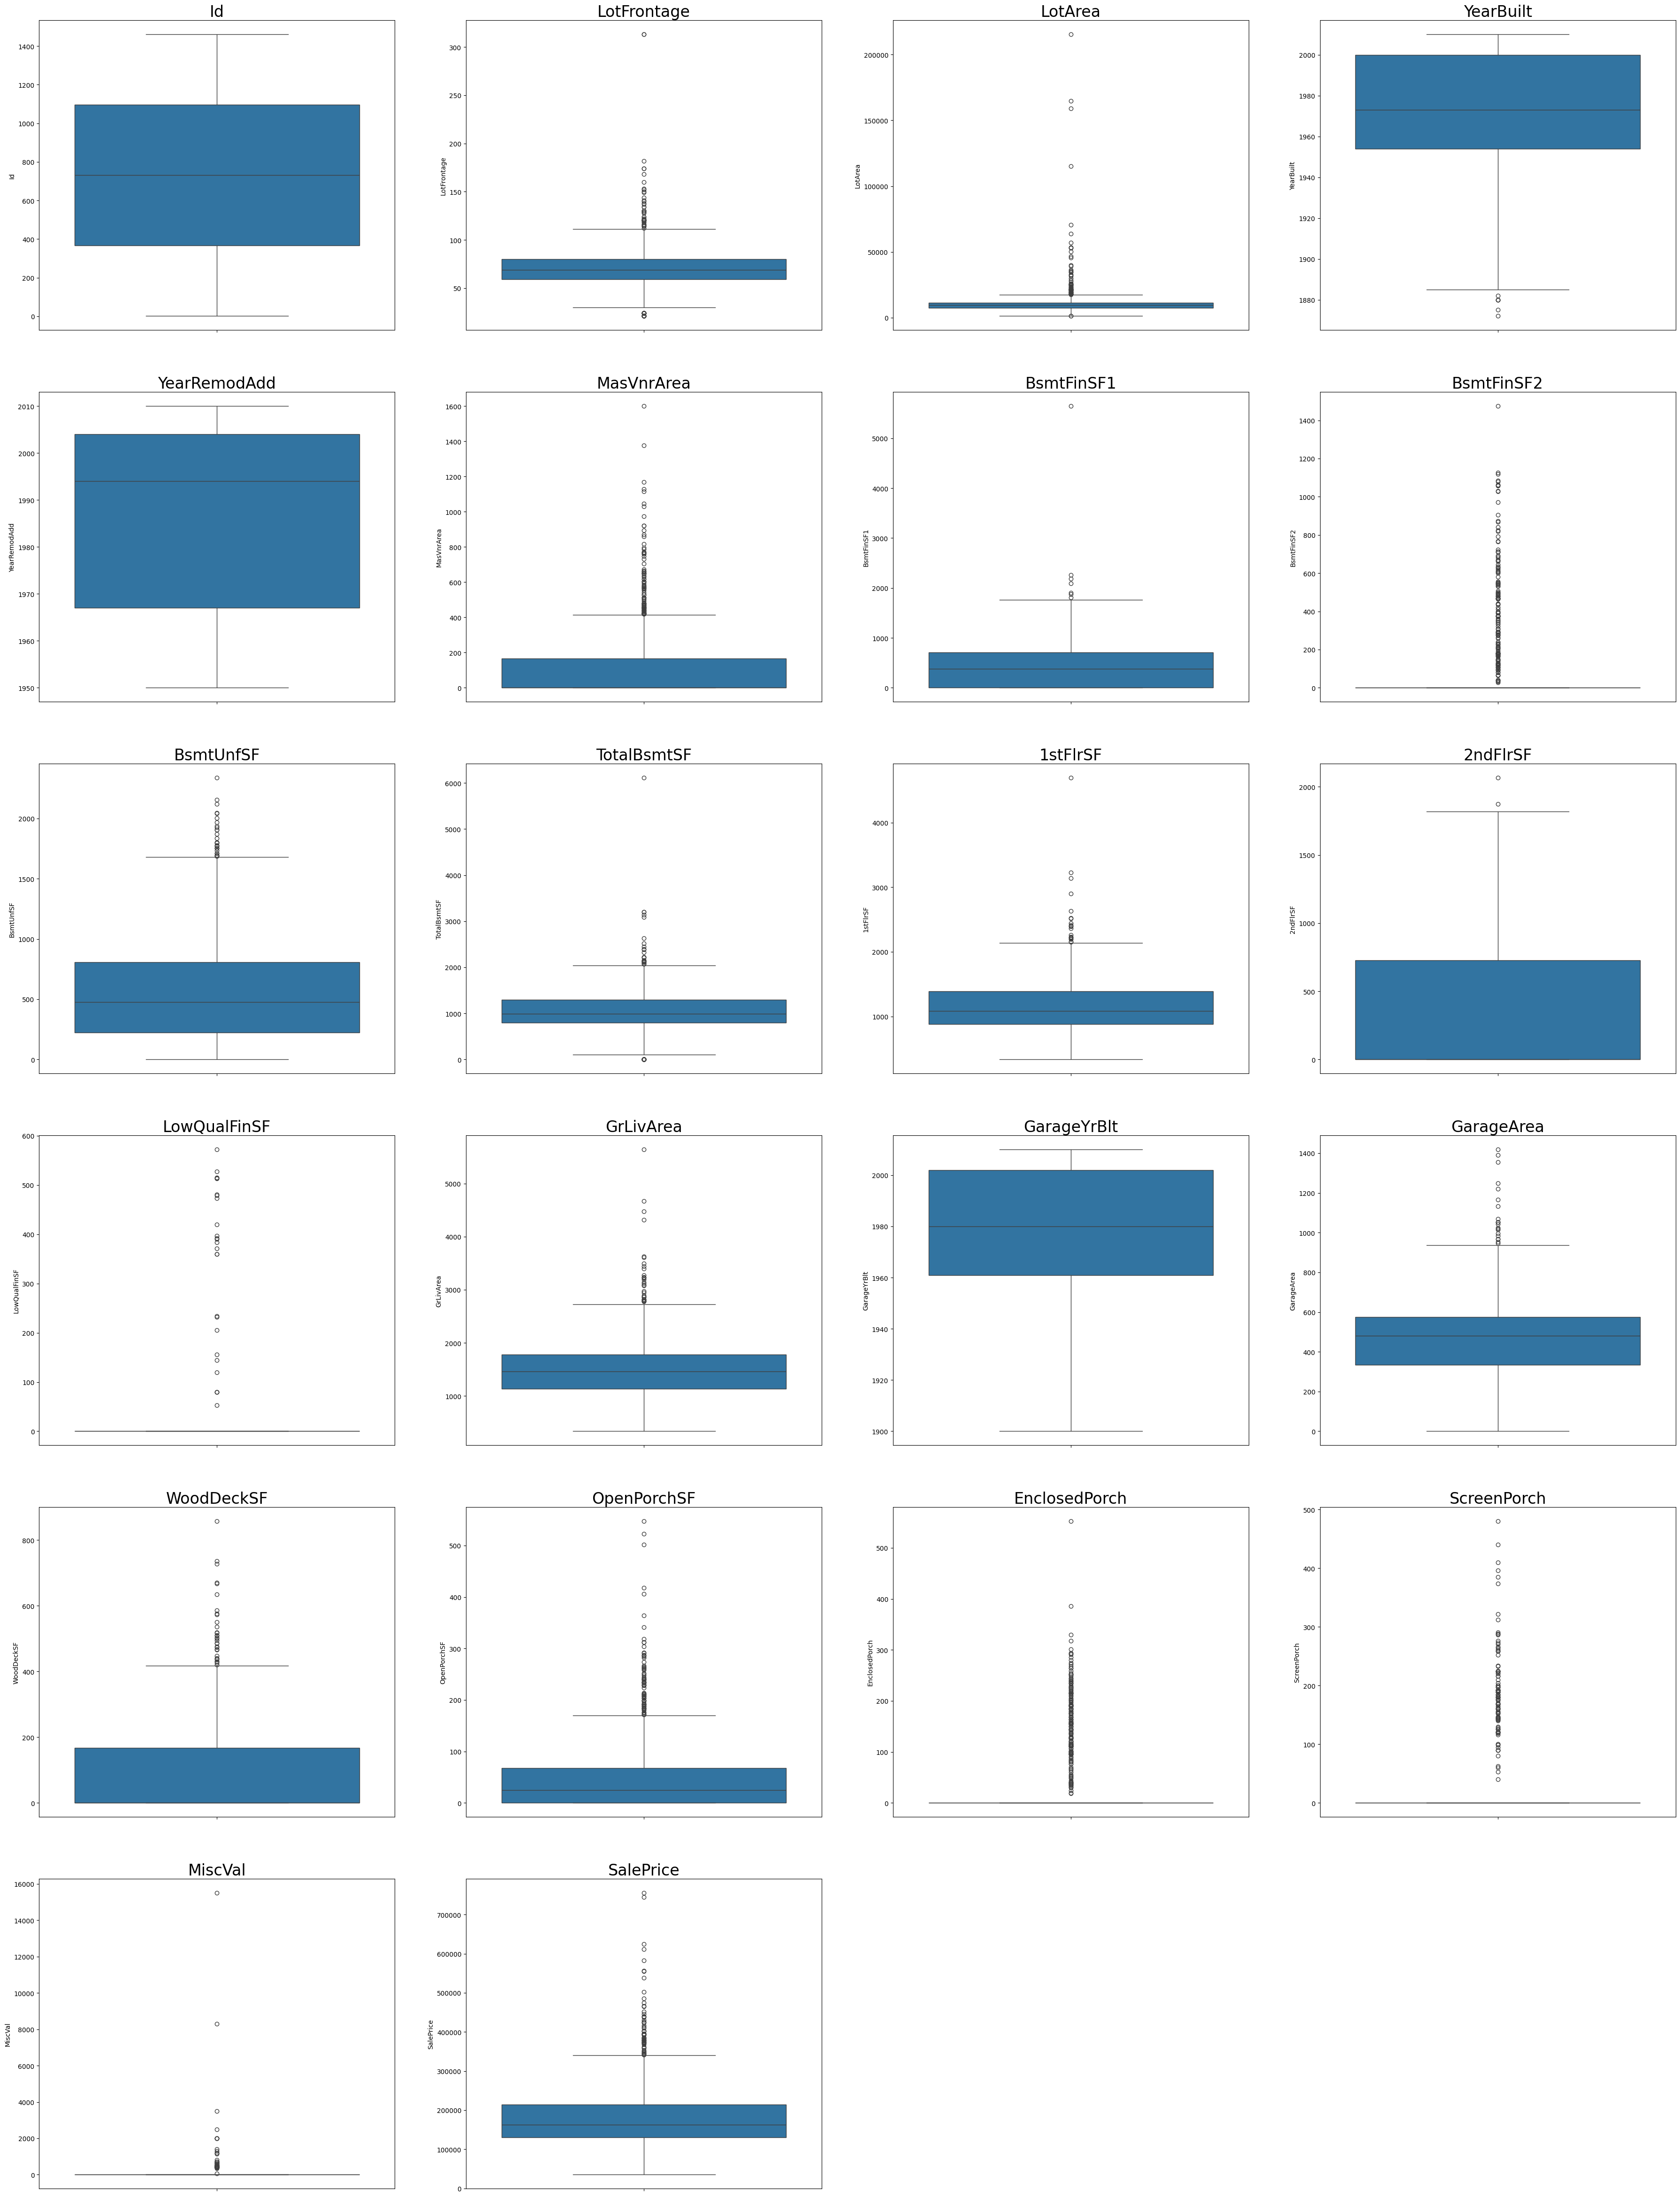

In [194]:
cantidadvariables= len(variables_numericas)
filasplot= (cantidadvariables+3) //4

fig,axes = plt.subplots(filasplot,4,figsize=(45,filasplot*10))
for i, variable in enumerate(variables_numericas):
  data = data.copy()
  fila = i // 4
  columna = i % 4
  sns.boxplot(y=data[variable],ax=axes[fila,columna])
  axes[fila, columna].set_title(variable, fontsize=24)  # Título del gráfico

for i in range(cantidadvariables,cantidadvariables+2):

  fig.delaxes(axes.flatten()[i])
plt.show()

#Variables Categoricas y Precio de vent

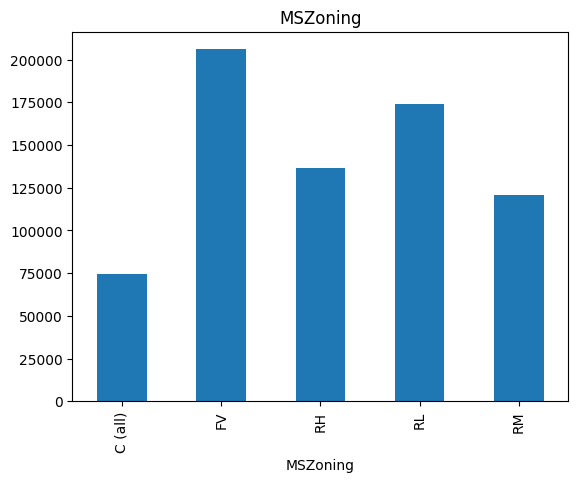

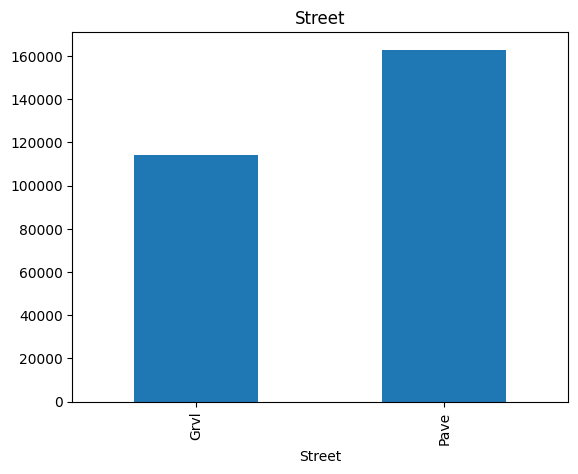

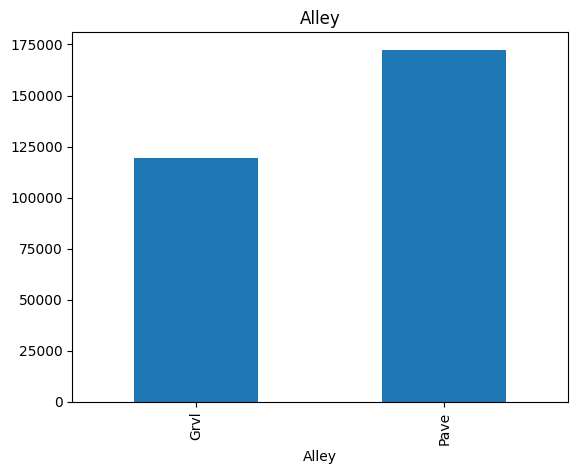

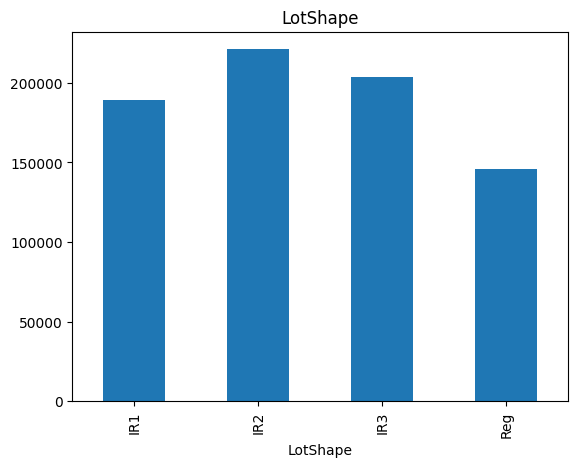

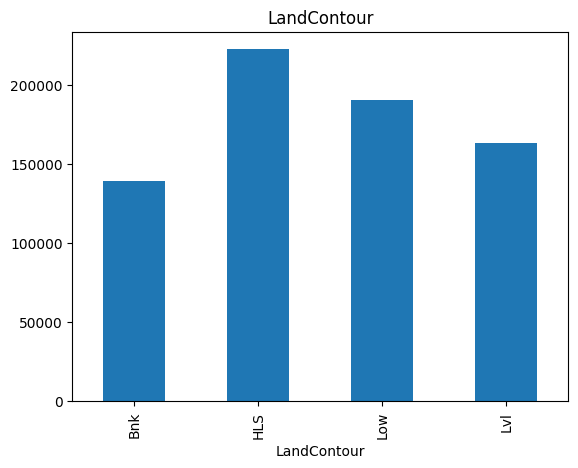

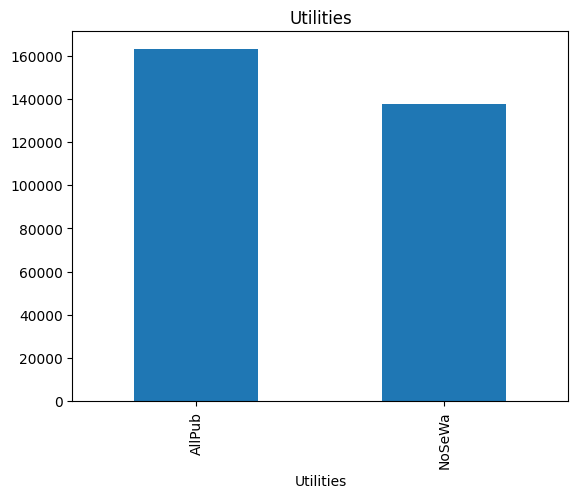

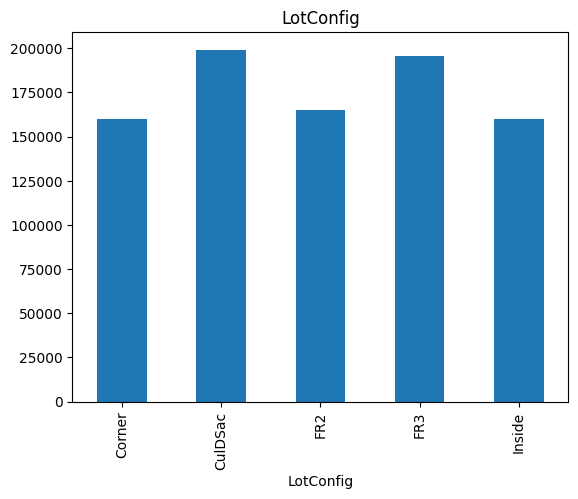

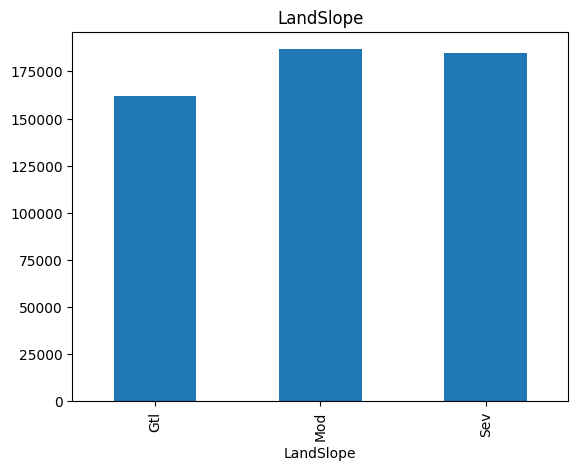

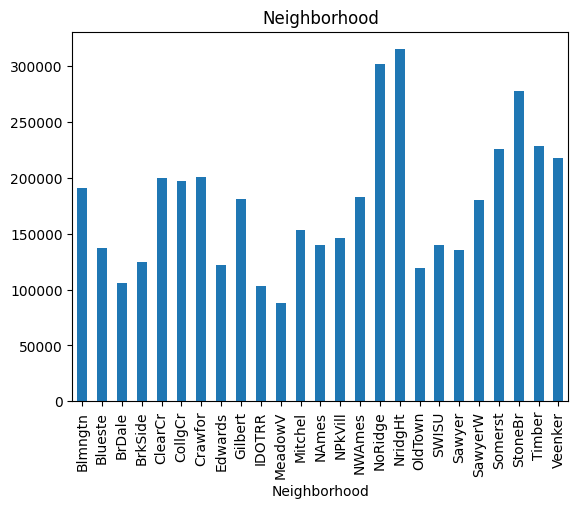

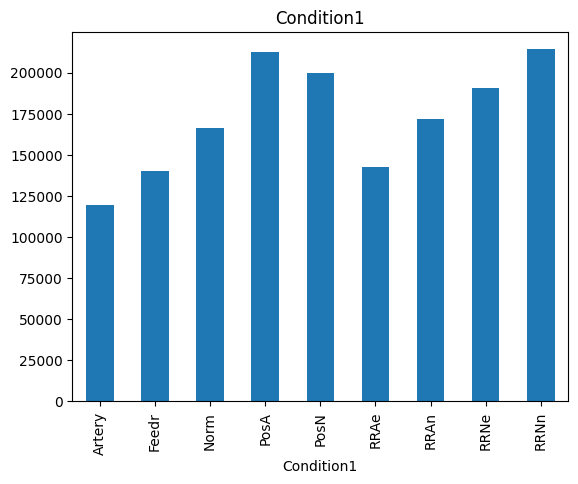

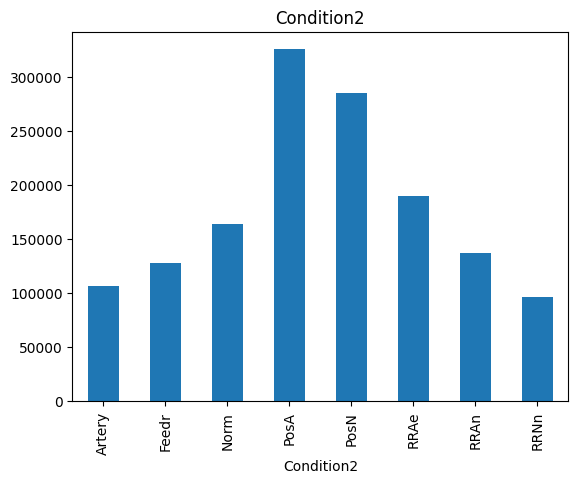

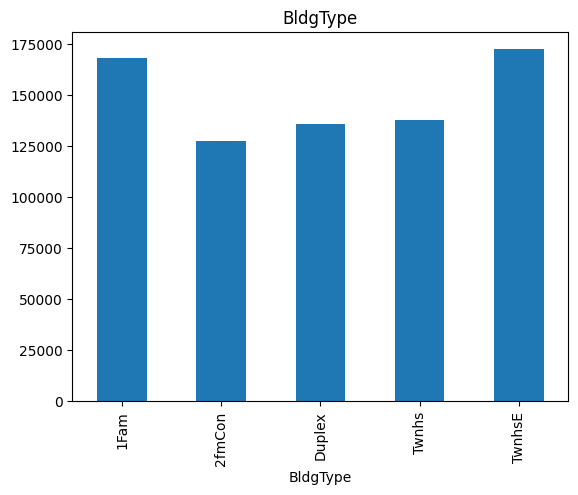

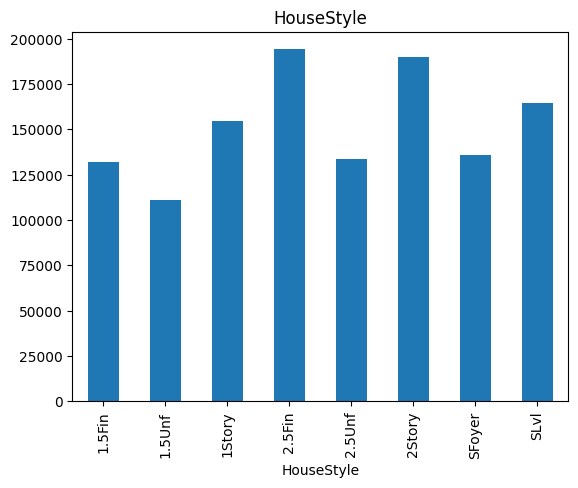

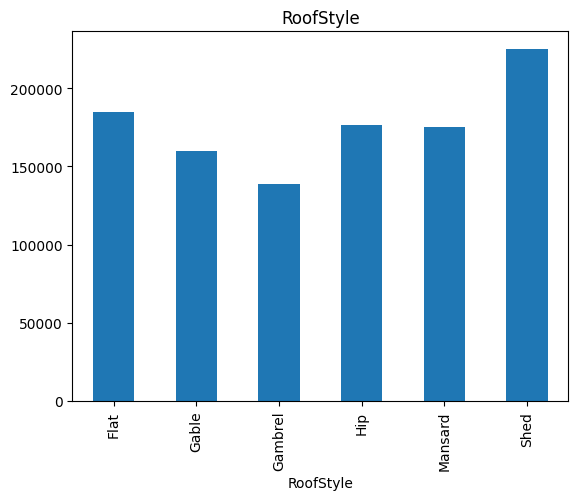

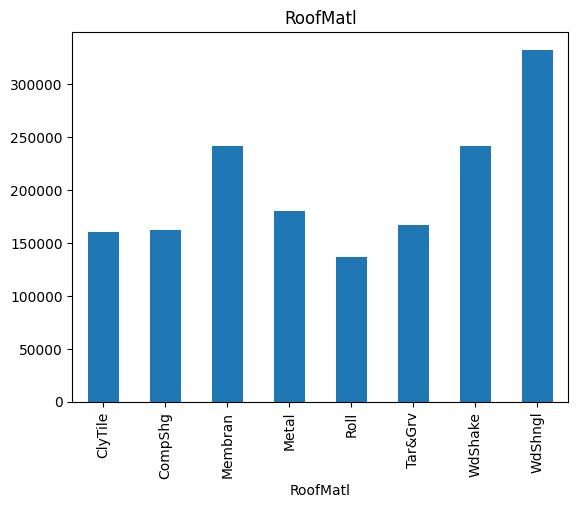

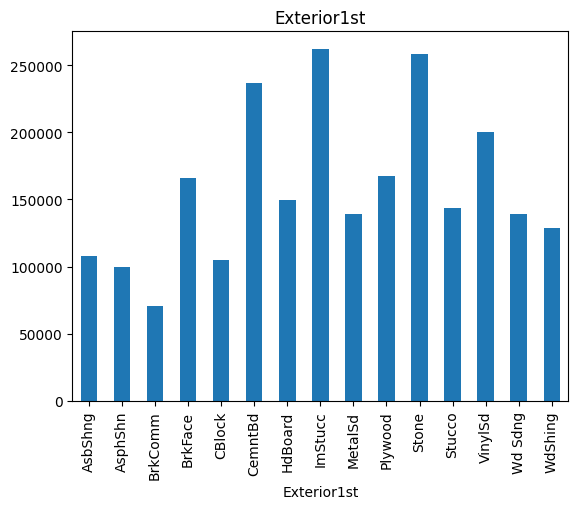

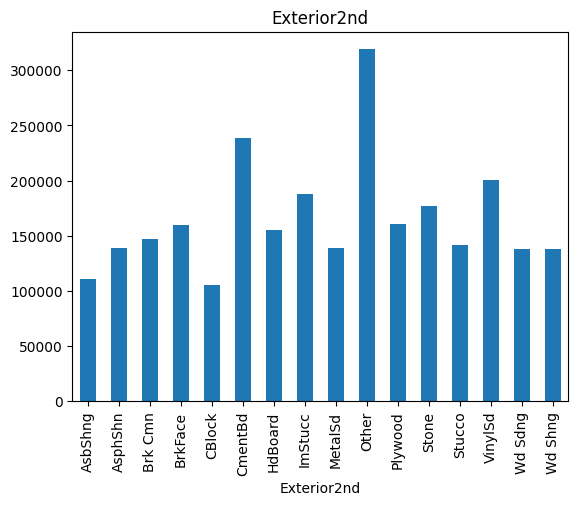

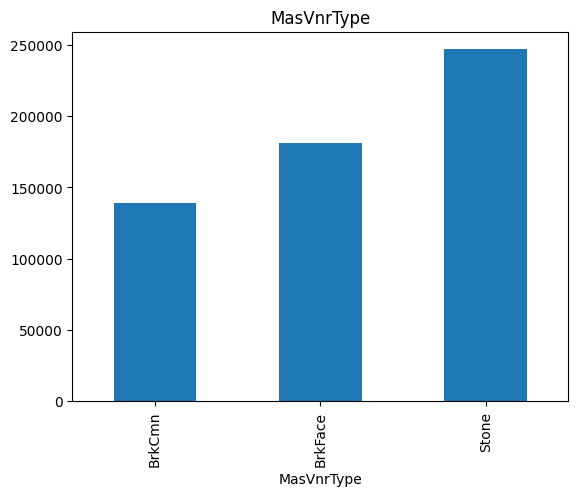

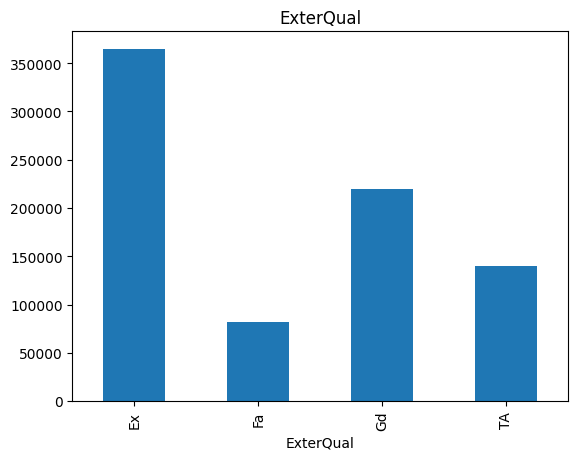

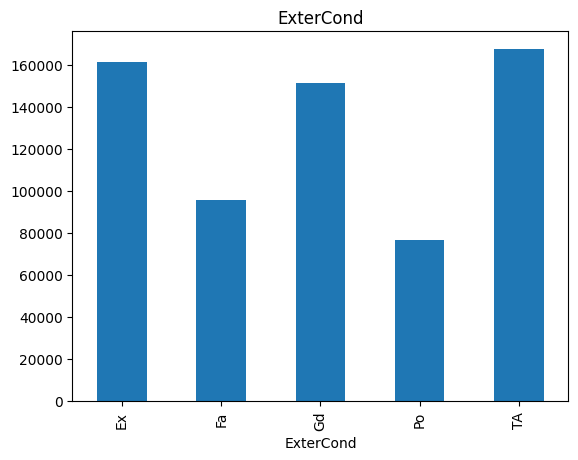

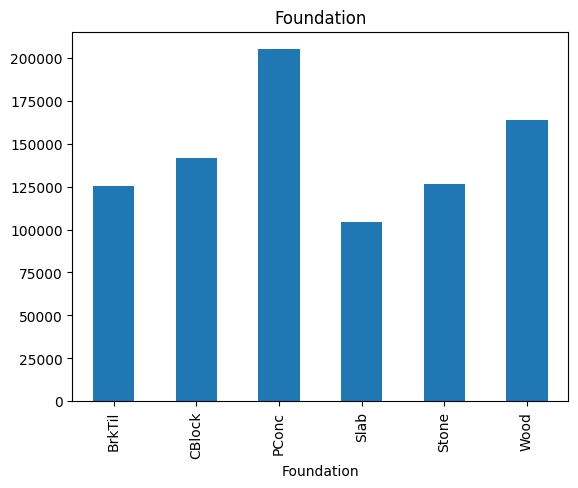

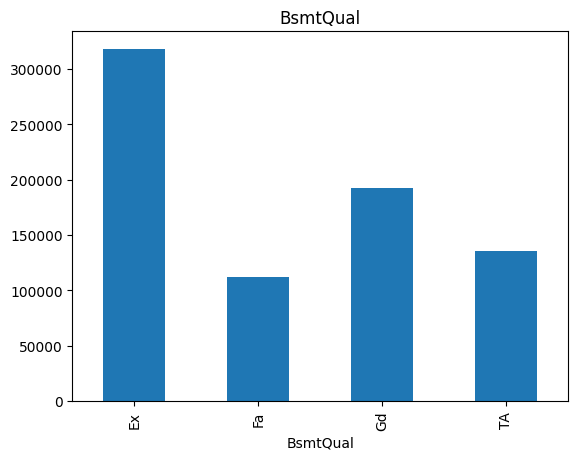

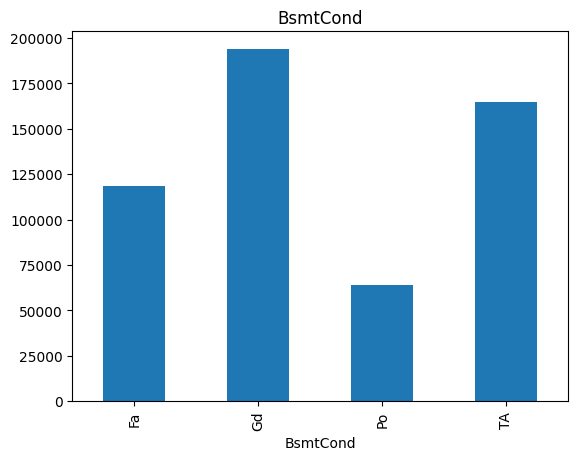

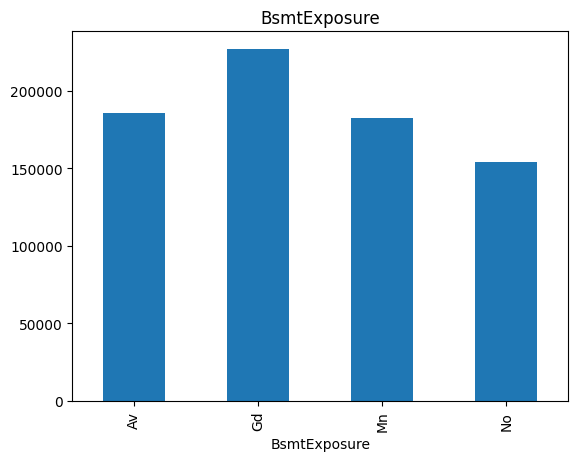

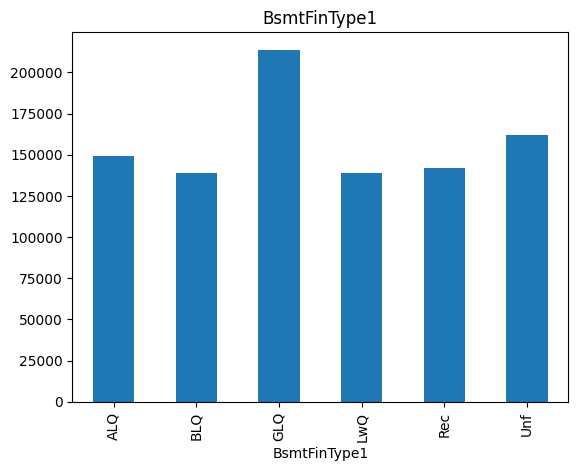

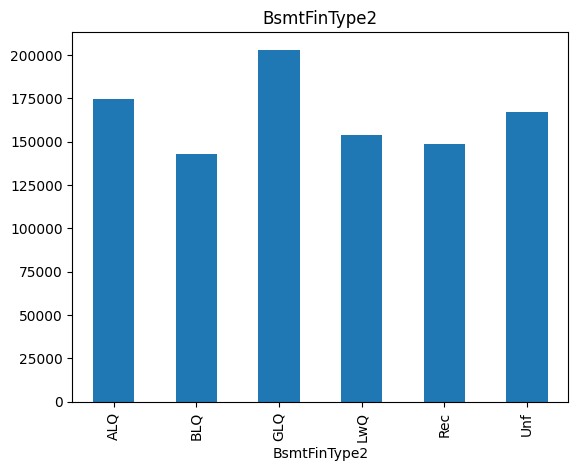

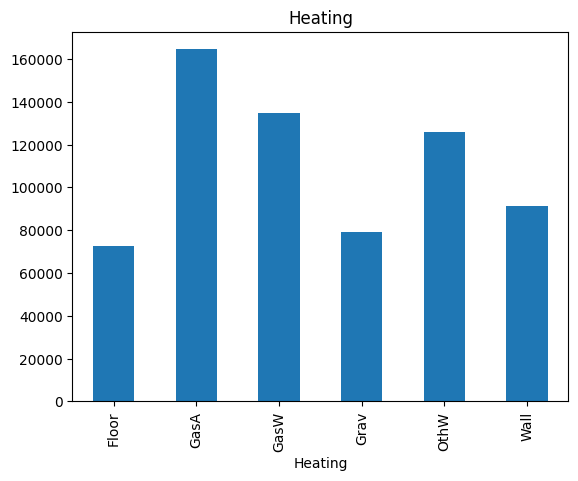

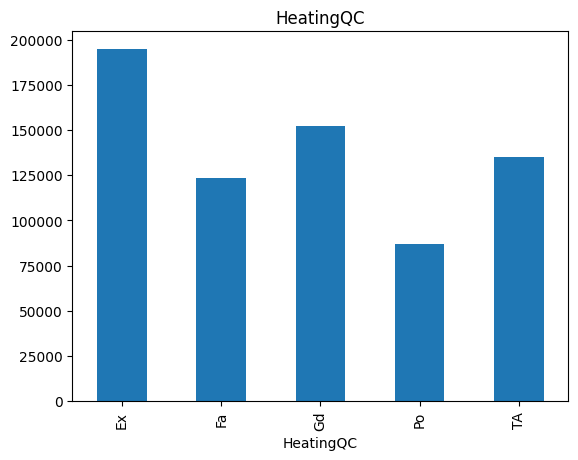

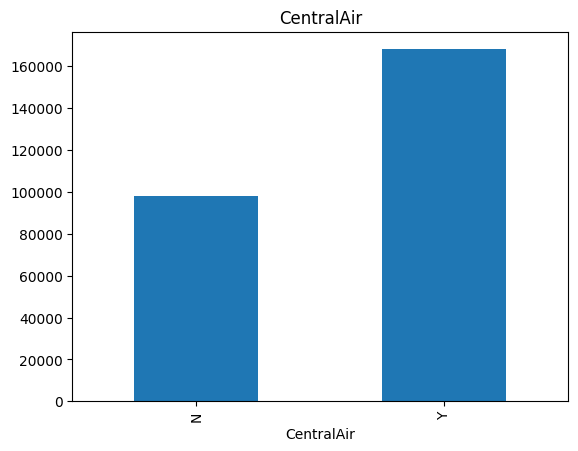

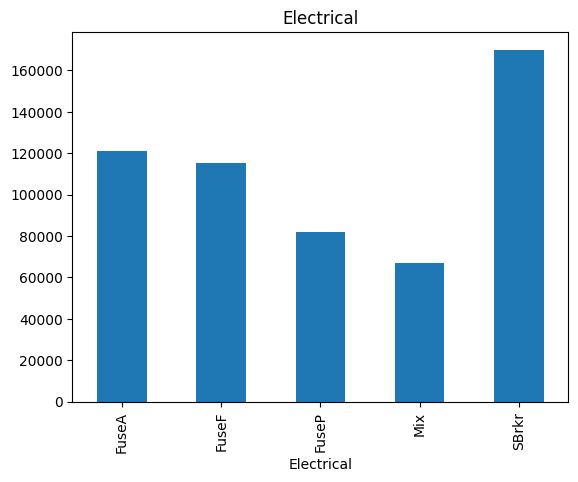

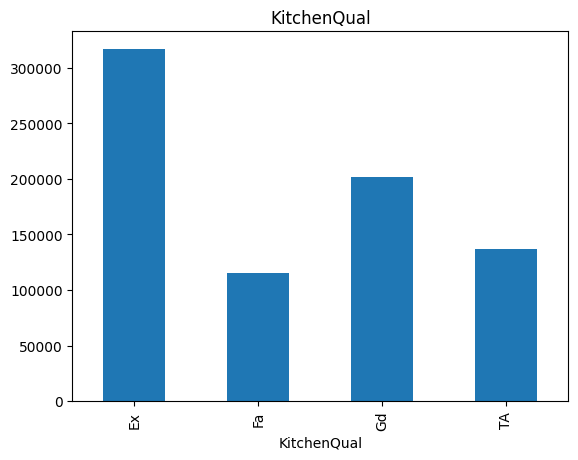

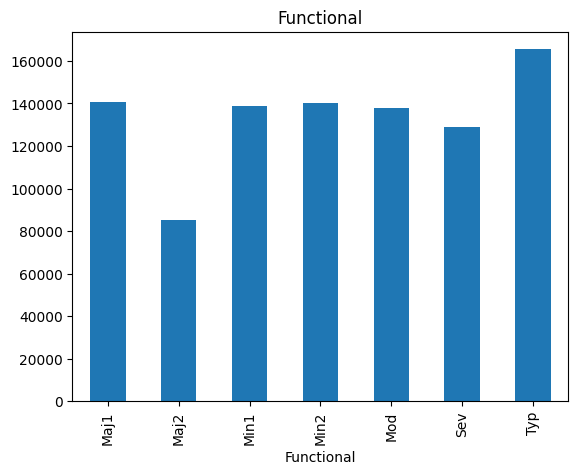

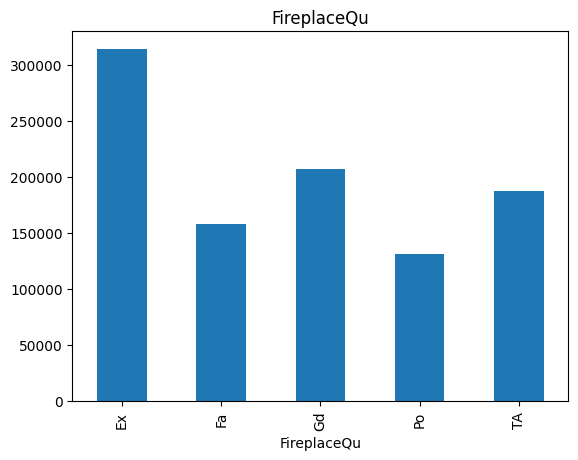

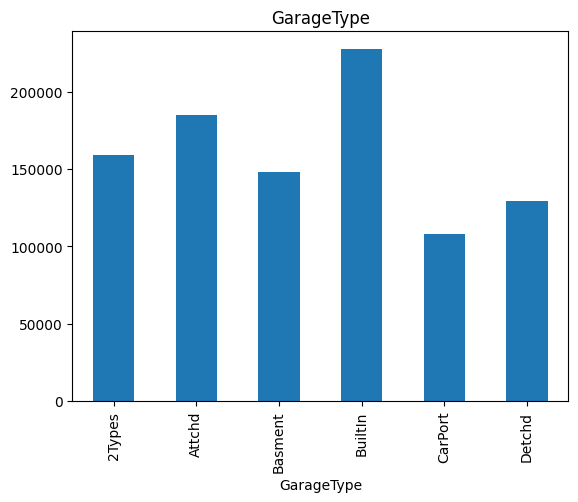

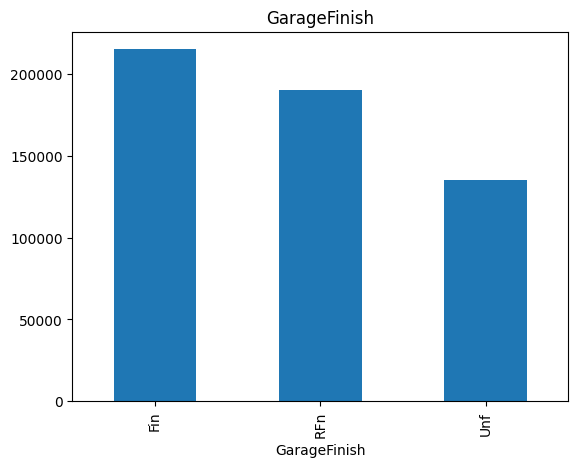

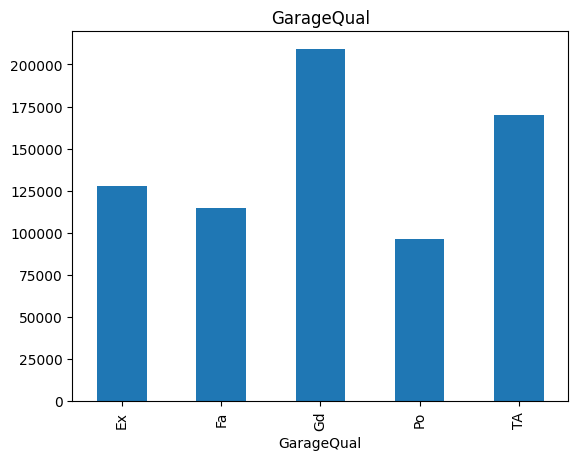

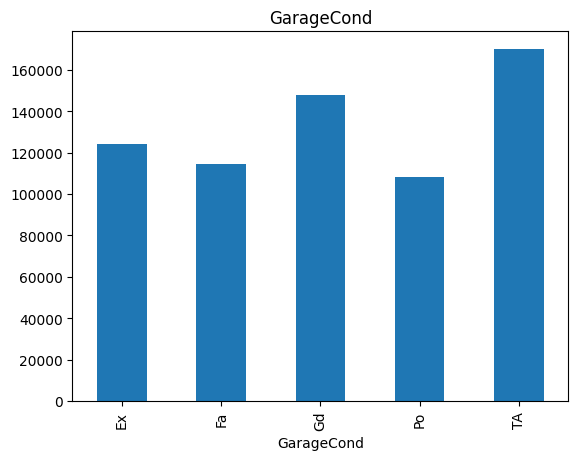

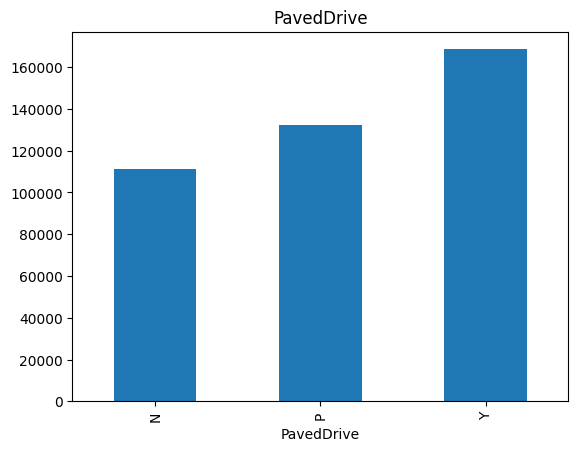

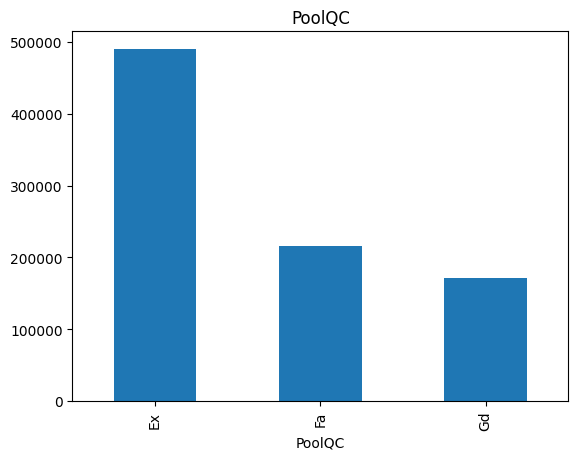

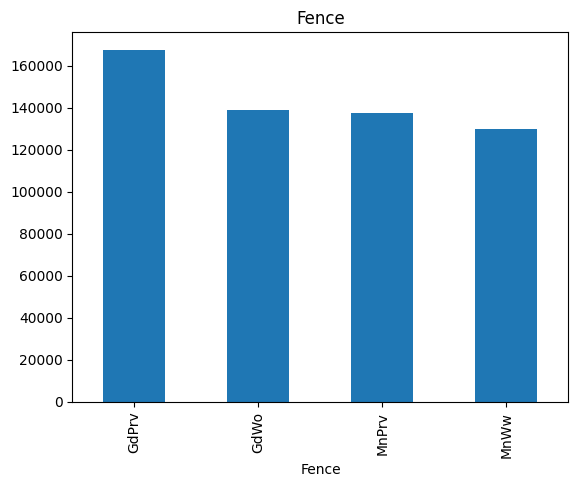

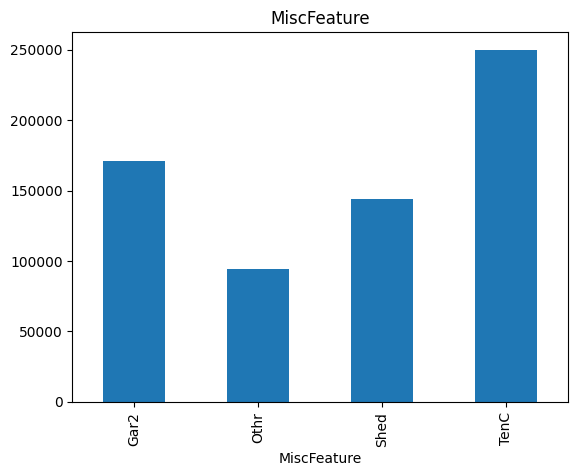

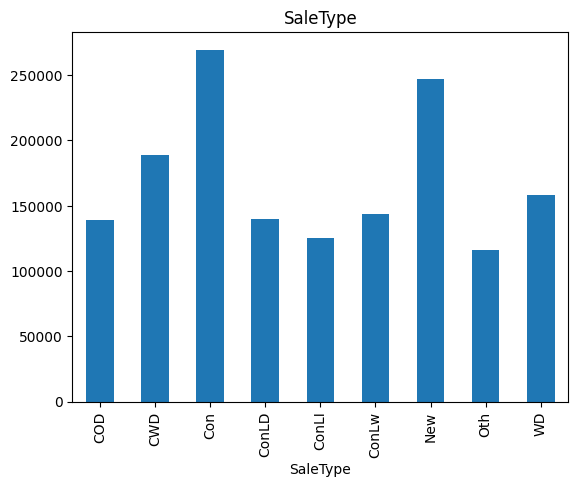

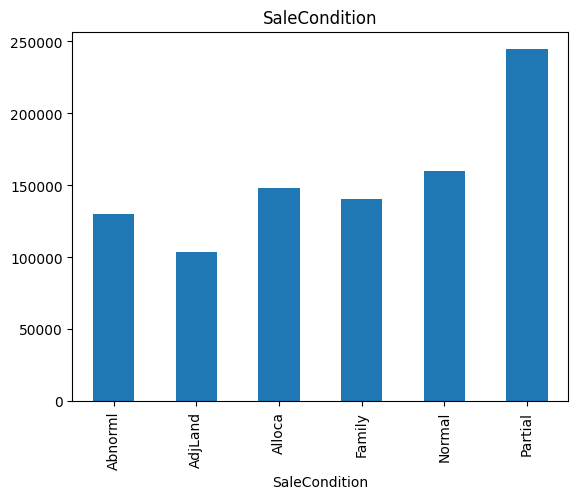

In [195]:
for feature in variables_categoricas:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

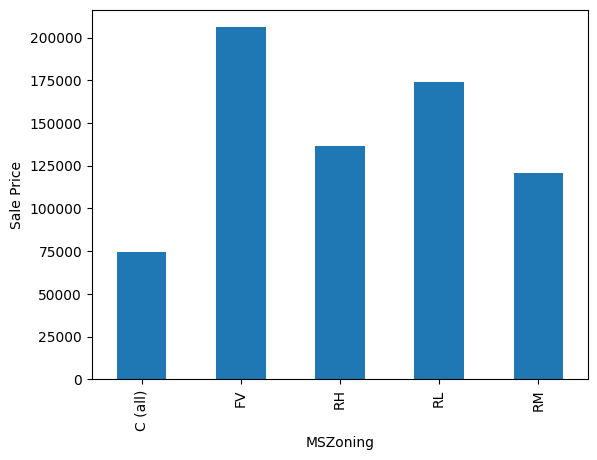

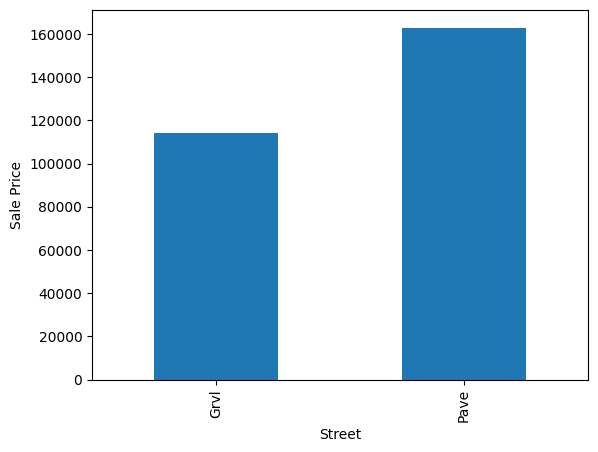

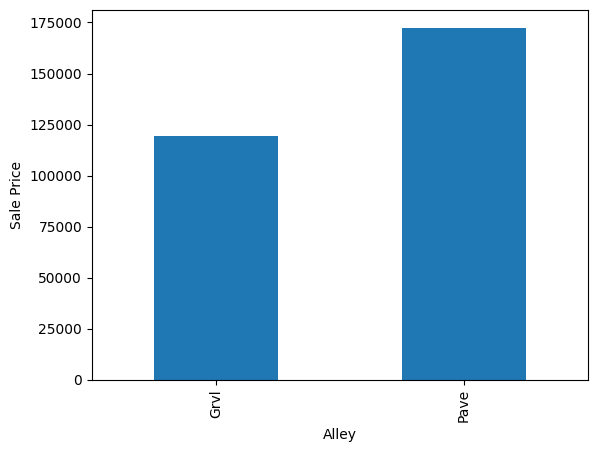

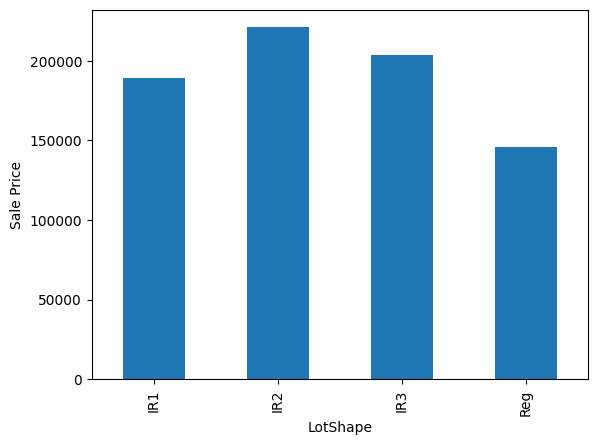

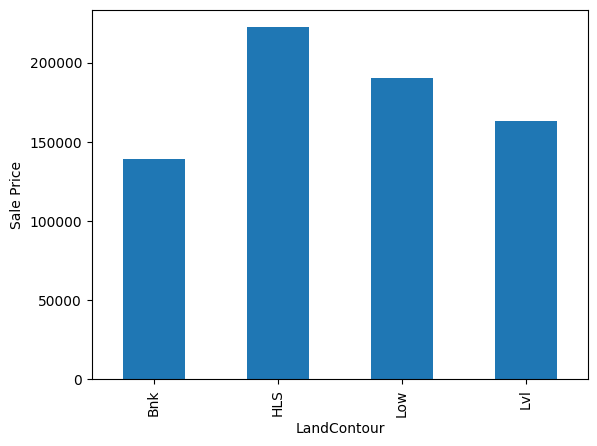

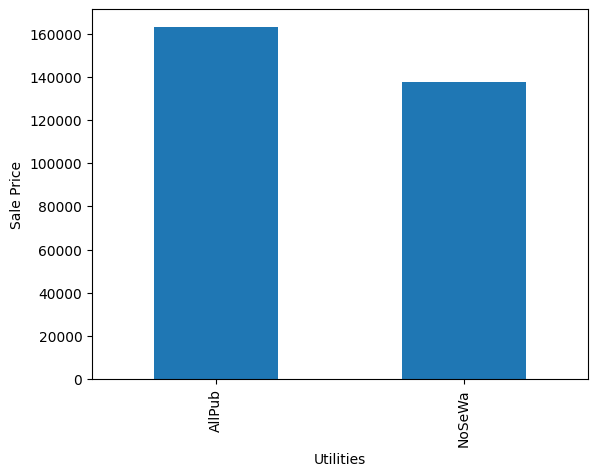

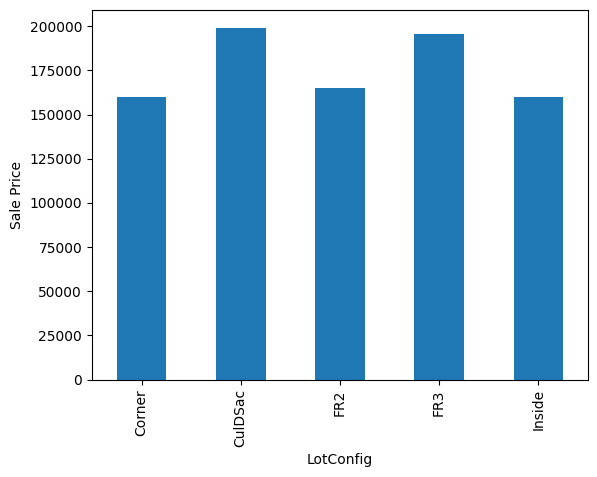

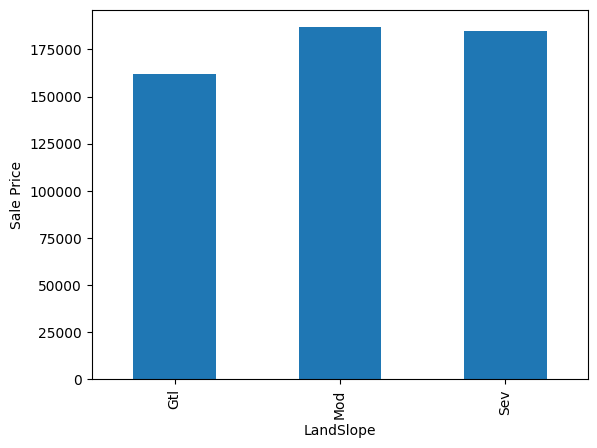

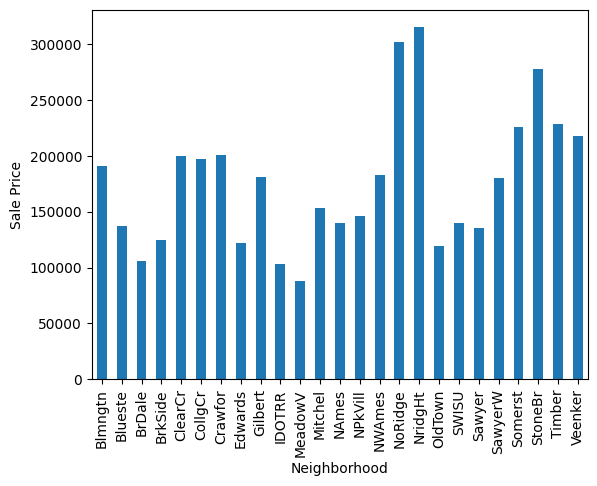

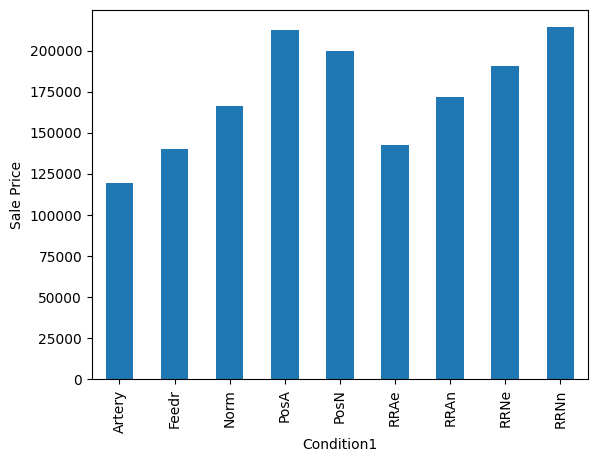

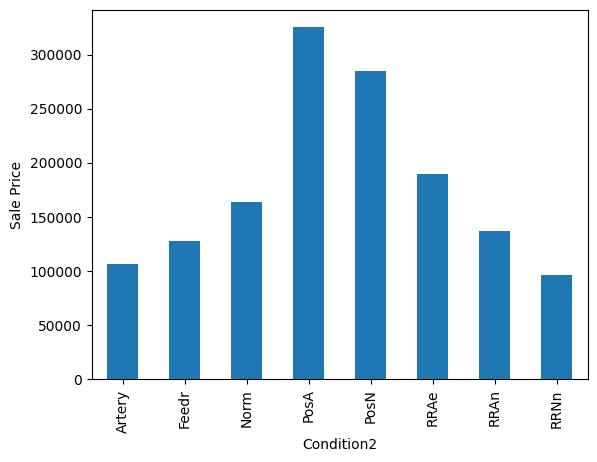

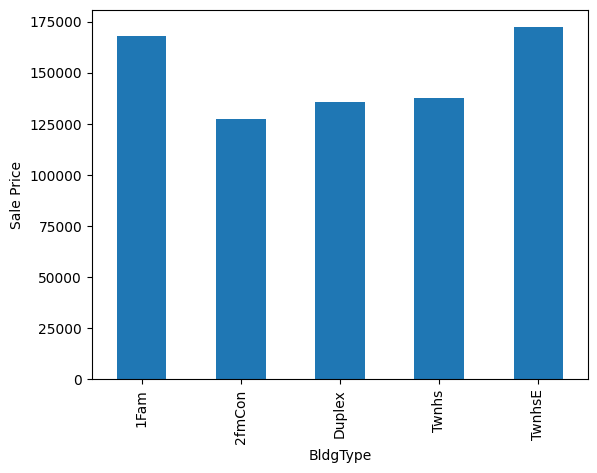

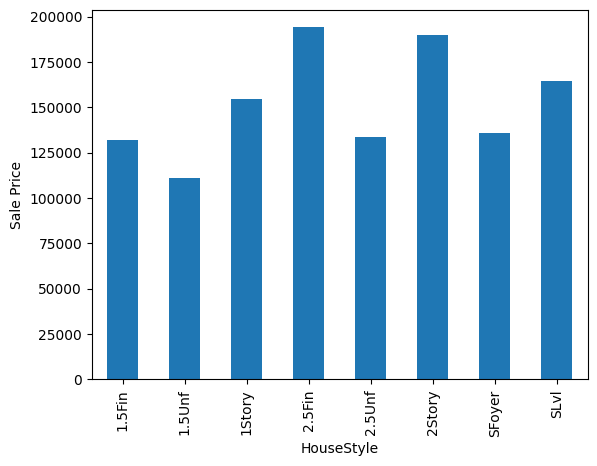

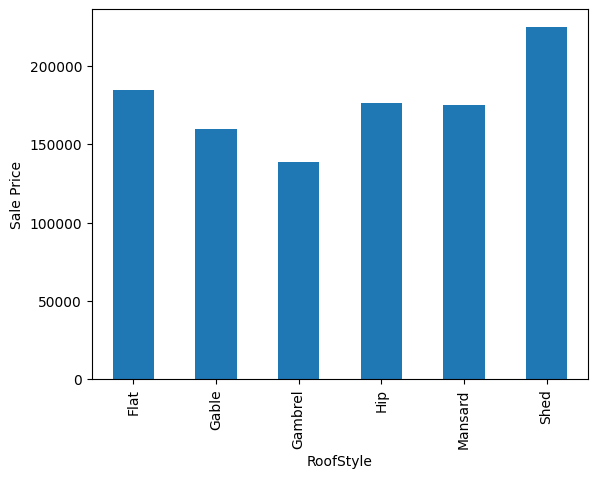

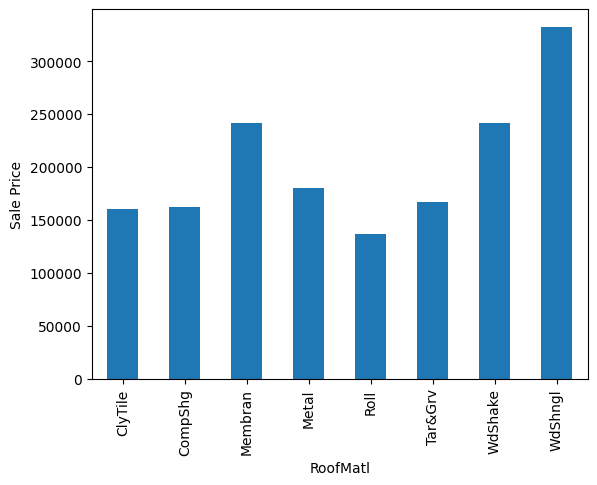

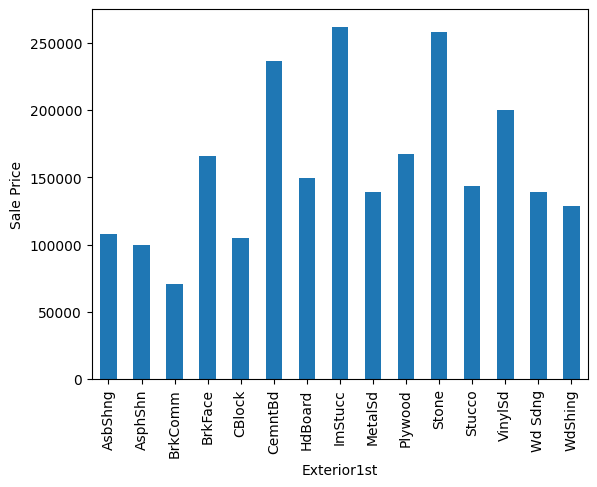

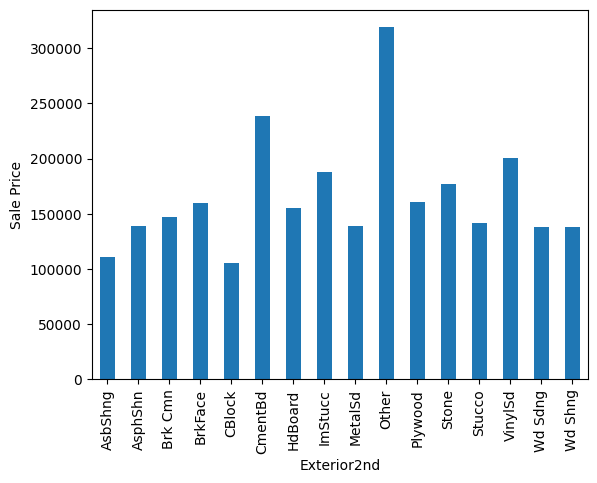

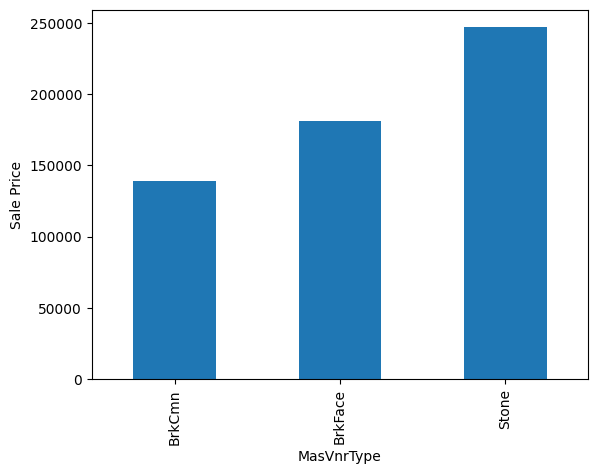

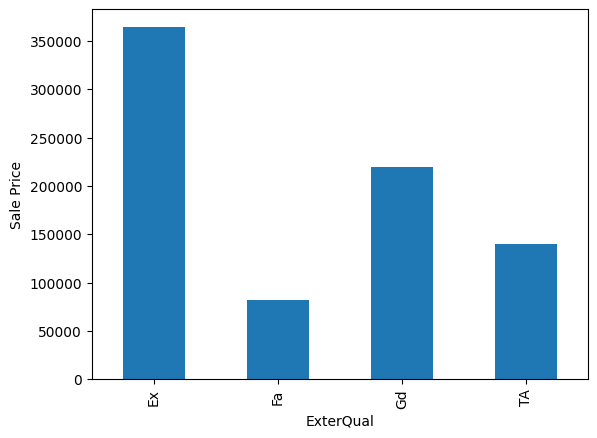

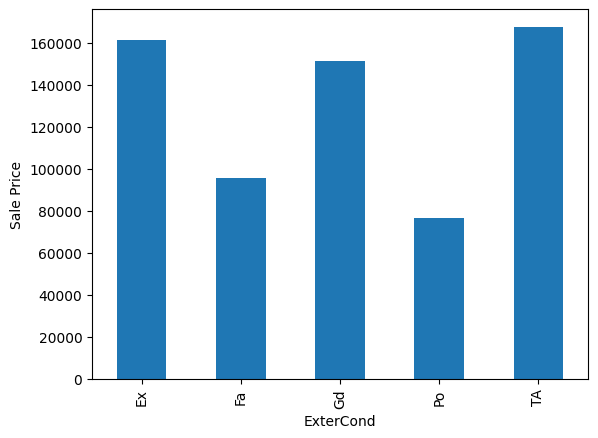

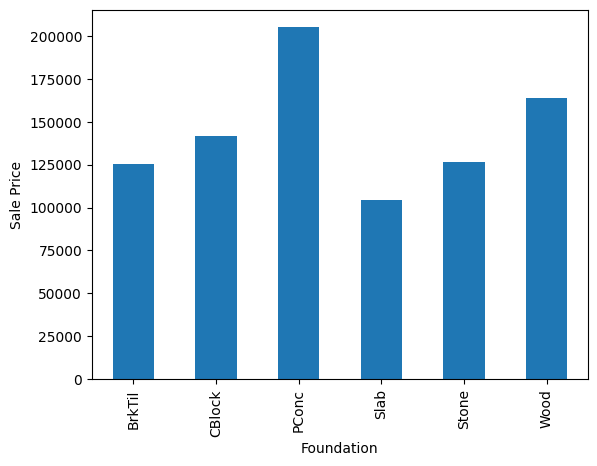

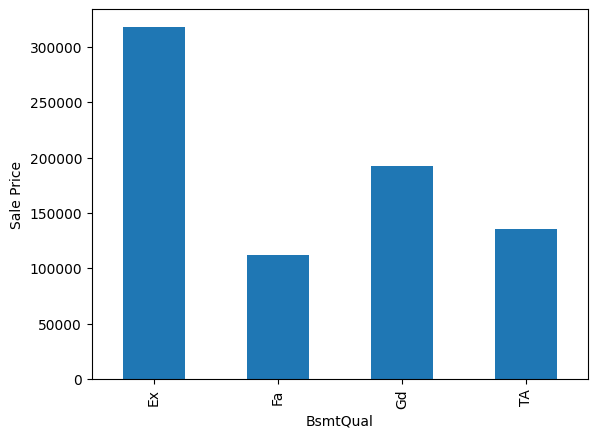

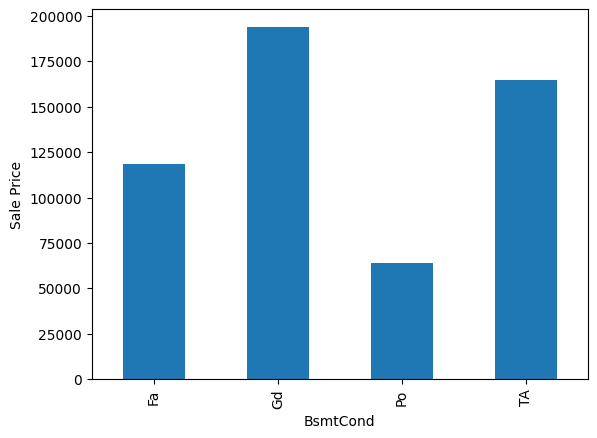

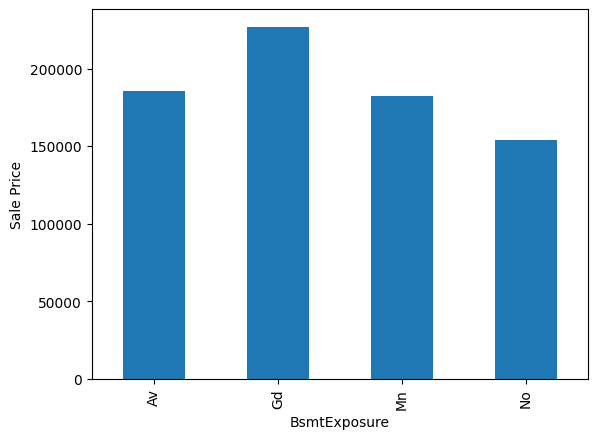

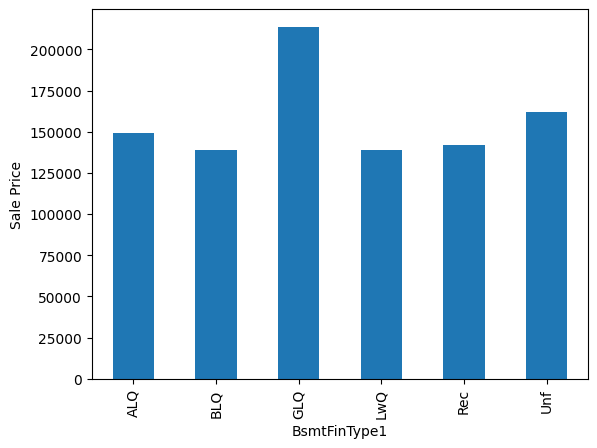

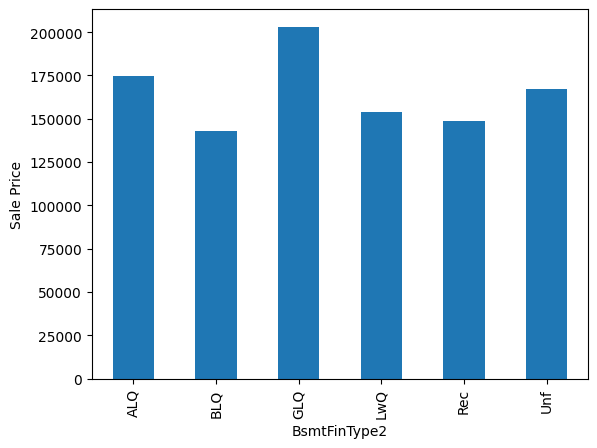

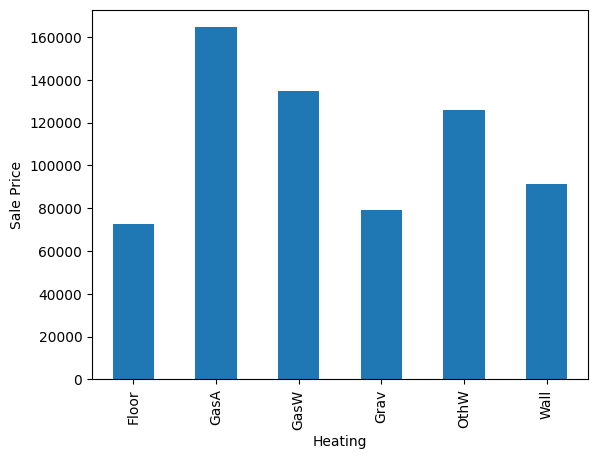

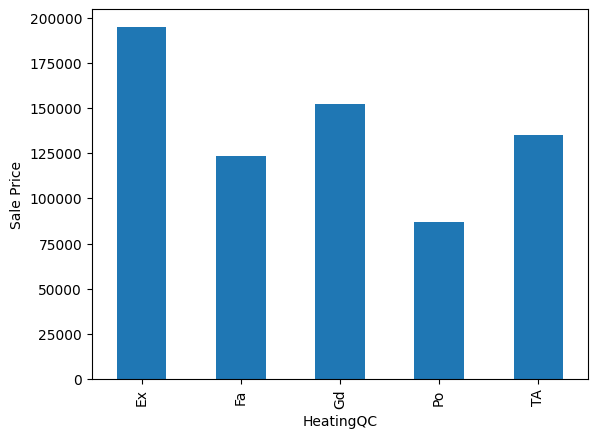

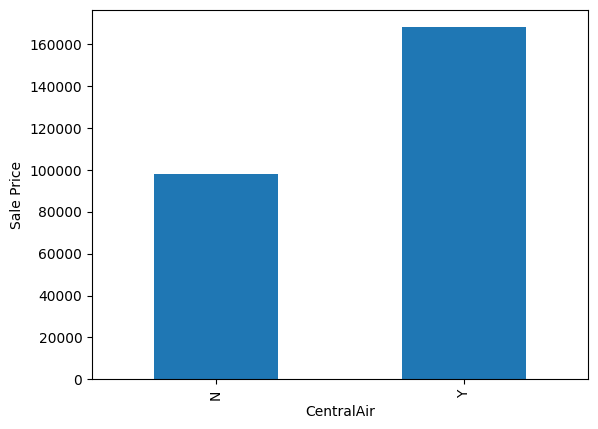

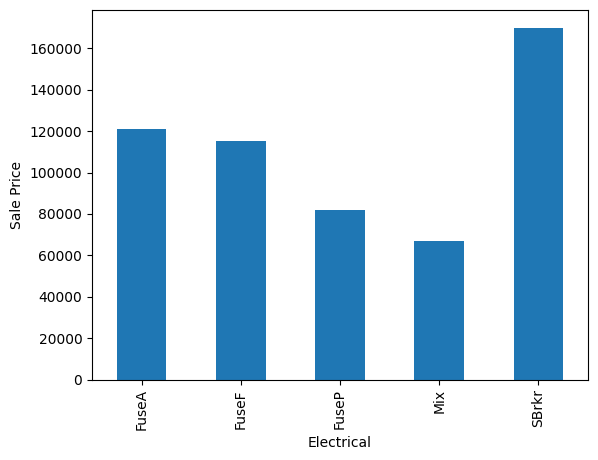

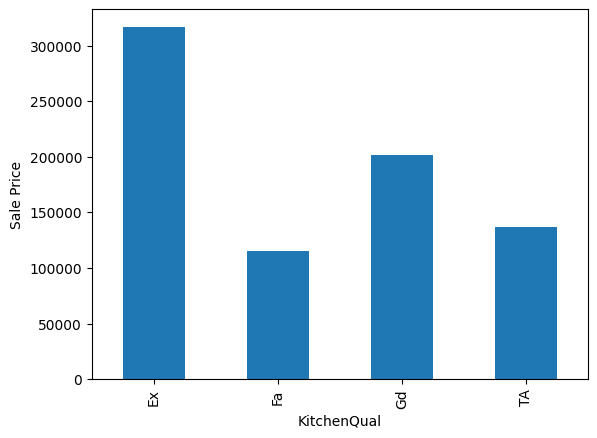

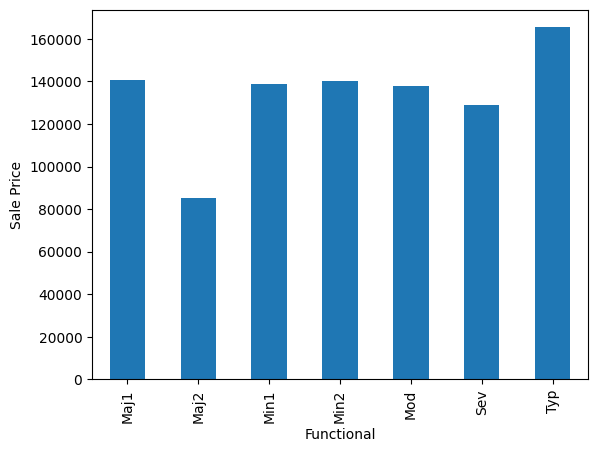

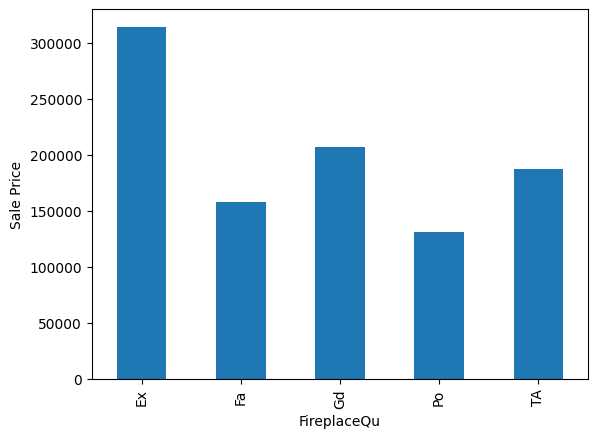

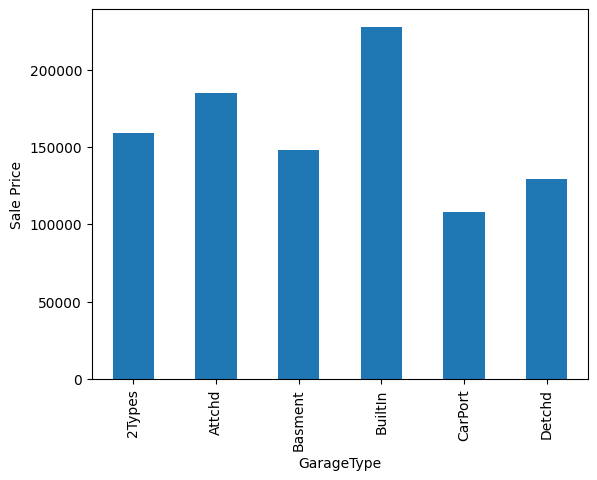

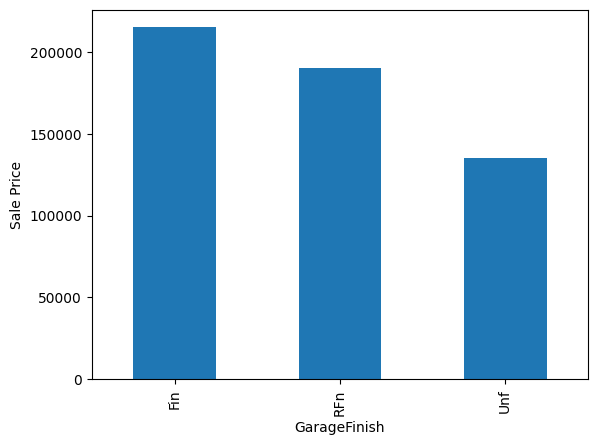

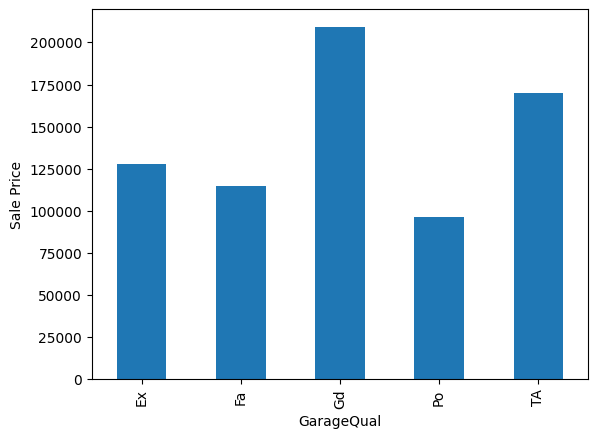

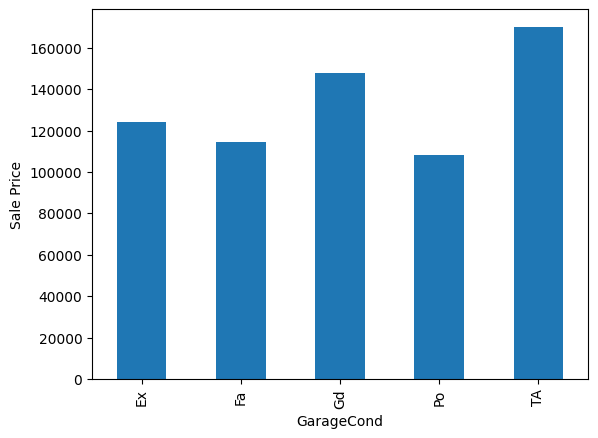

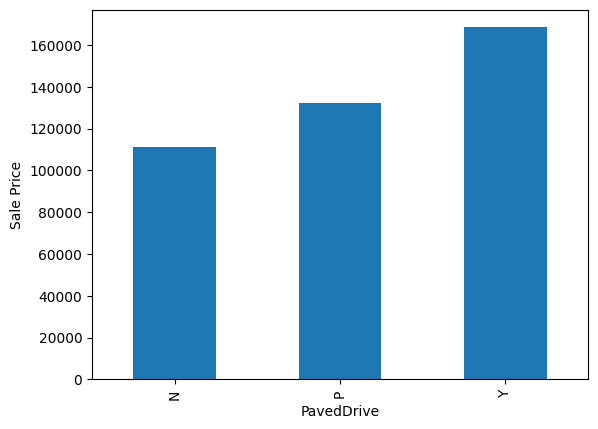

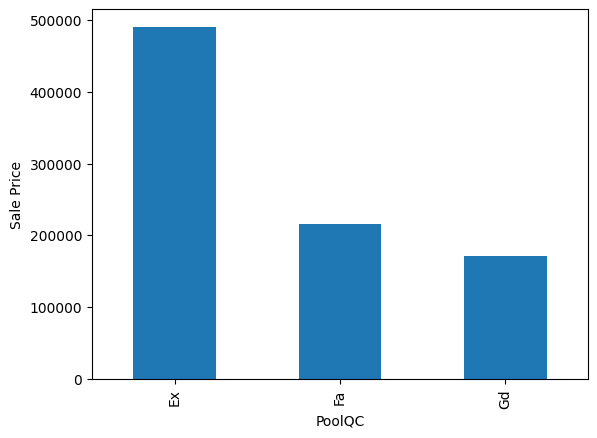

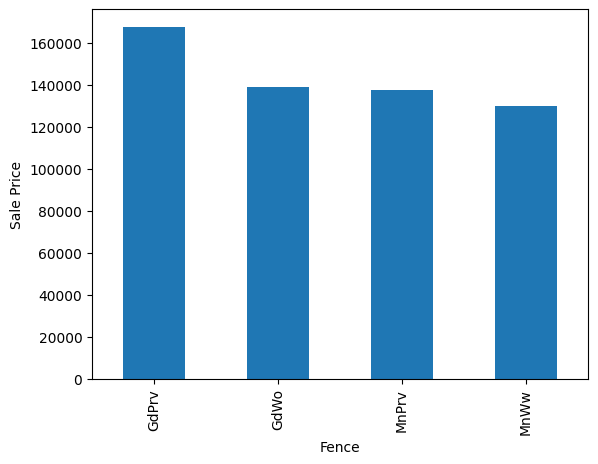

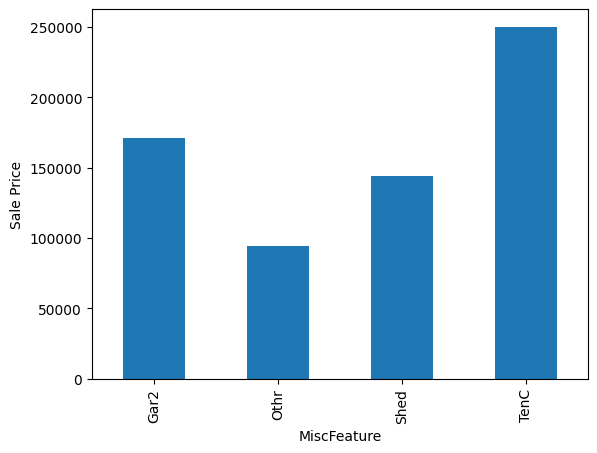

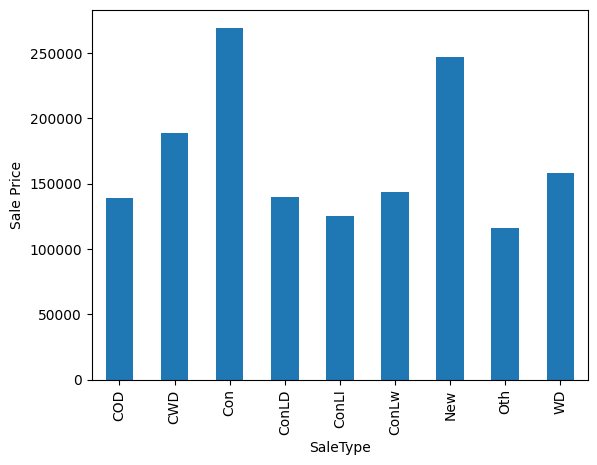

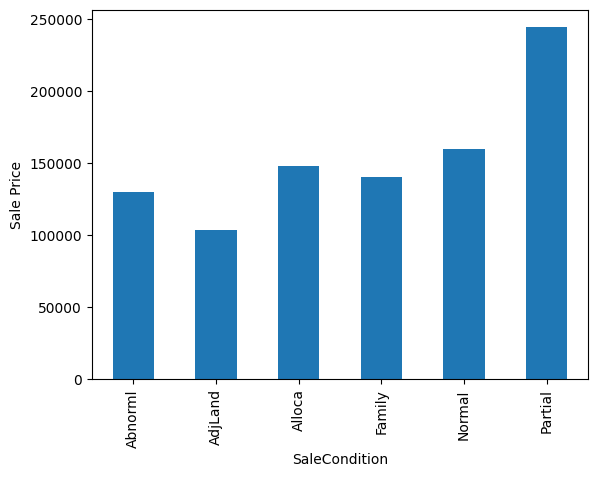

In [196]:
for feature in variables_categoricas:
  data = df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Sale Price")
  plt.show()

#Feature engineering


In [197]:
##columnas con nulos en df
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes == "O"]
for features in features_nan:
  print(f'para el feature {features} hay %{np.round(df[features].isnull().mean(),2)}')

para el feature Alley hay %0.94
para el feature MasVnrType hay %0.6
para el feature BsmtQual hay %0.03
para el feature BsmtCond hay %0.03
para el feature BsmtExposure hay %0.03
para el feature BsmtFinType1 hay %0.03
para el feature BsmtFinType2 hay %0.03
para el feature Electrical hay %0.0
para el feature FireplaceQu hay %0.47
para el feature GarageType hay %0.06
para el feature GarageFinish hay %0.06
para el feature GarageQual hay %0.06
para el feature GarageCond hay %0.06
para el feature PoolQC hay %1.0
para el feature Fence hay %0.81
para el feature MiscFeature hay %0.96


In [198]:
error= [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [199]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes != "O"]
for features in numerical_nan:
  print(f'para el feature {features} hay %{np.round(df[features].isnull().mean(),2)}')

para el feature LotFrontage hay %0.18
para el feature MasVnrArea hay %0.01
para el feature GarageYrBlt hay %0.06


In [200]:
numerical_nan1 = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0 and dftest[feature].dtypes != "O"]

for features in numerical_nan:
  print(f'para el feature {features} hay %{np.round(dftest[features].isnull().mean(),2)}')

para el feature LotFrontage hay %0.16
para el feature MasVnrArea hay %0.01
para el feature GarageYrBlt hay %0.05


In [201]:
##columnas con nulos en df test
missingTest = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0 and dftest[feature].dtypes == "O"]


## Reemplazo de Nulos

In [202]:
#funcion de reemplazo de nulos
def remplazarNulos (dataset,arraydevalores):
  data=dataset.copy()
  data[arraydevalores]= data[arraydevalores].fillna("Missing")
  return data

In [203]:
df = remplazarNulos(df,features_nan) #transformacion en Dataset utilizado para entrenamiento
dftest = remplazarNulos(dftest,missingTest) #transformacion en test

In [204]:
for feature in numerical_nan:
  mediana= df[feature].median()

  df[feature+'nan']=np.where(df[feature].isnull(),1,0)
  df[feature].fillna(mediana,inplace=True)
df[numerical_nan].isnull().sum()


C:\Users\BUCEFALO\AppData\Local\Temp\ipykernel_26440\1326684934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mediana,inplace=True)
C:\Users\BUCEFALO\AppData\Local\Temp\ipykernel_26440\1326684934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [205]:
# Aplicacion de mediana en valores numericos de test
for feature in numerical_nan1:
  mediana= dftest[feature].median()

  dftest[feature+'nan']=np.where(dftest[feature].isnull(),1,0)
  dftest[feature].fillna(mediana,inplace=True)# transformacion en test
dftest[numerical_nan1].isnull().sum()


C:\Users\BUCEFALO\AppData\Local\Temp\ipykernel_26440\1772651133.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest[feature].fillna(mediana,inplace=True)# transformacion en test
C:\Users\BUCEFALO\AppData\Local\Temp\ipykernel_26440\1772651133.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [206]:
# Generacion de variables de tiempo 
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df[feature] = df["YrSold"]-df[feature]  


In [207]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:#transformacion en test
  dftest[feature] = dftest["YrSold"]-dftest[feature]

In [208]:
variablessincero = [feature for feature in variables_numericas if (df[feature]!=0).all() and feature not in ["Id","SalePrice"] ]

In [209]:
feature_a = ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']

In [210]:
#Transformacion Logaritmica de variables numericas (sin cero)
def log_transform(df):
    # Copia el DataFrame para no modificar el original
    df_transformed = df.copy()
    
    feature_a = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath',
       'GarageArea', 'OpenPorchSF',  'YrSold']
    
    # Identifica las columnas para las que aplicar la transformación
    variablessincero = [feature for feature in feature_a if (df[feature]!=0).all() and feature not in ["Id","SalePrice"] ]
    
    # Aplica la transformación logarítmica
    for feature in variablessincero:
        df_transformed[feature] = np.log(df_transformed[feature])
    
    return df_transformed

In [211]:
import pickle
pickle.dump(log_transform,open("logtransform.pkl","wb") )
picklelog=pickle.load(open("logtransform.pkl","rb"))

In [212]:
#aplicacion de transformacion logaritmica a los dataframe
df= picklelog(df)
dftest= picklelog(dftest)

#Remover Categoricas NO relevantes

In [213]:
for feature in variables_categoricas:
  temp=df.groupby(feature)["SalePrice"].count()/len(df)
  temp_df=temp[temp>0.01].index
  df[feature]=np.where(df[feature].isin(temp_df),df[feature],"Rare_var")
  dftest[feature]=np.where(dftest[feature].isin(temp_df),dftest[feature],"Rare_var")


In [214]:
for feature in variables_categoricas:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)

    df[feature]=df[feature].map(labels_ordered)
    dftest[feature]=dftest[feature].map(labels_ordered)

{'Rare_var': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
{'Rare_var': 0, 'Pave': 1}
{'Grvl': 0, 'Pave': 1, 'Missing': 2}
{'Reg': 0, 'IR1': 1, 'Rare_var': 2, 'IR2': 3}
{'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
{'Rare_var': 0, 'AllPub': 1}
{'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare_var': 3, 'CulDSac': 4}
{'Gtl': 0, 'Mod': 1, 'Rare_var': 2}
{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'Rare_var': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}
{'Artery': 0, 'Feedr': 1, 'Rare_var': 2, 'RRAn': 3, 'Norm': 4, 'PosN': 5}
{'Rare_var': 0, 'Norm': 1}
{'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}
{'SFoyer': 0, '1.5Fin': 1, 'Rare_var': 2, 'SLvl': 3, '1Story': 4, '2Story': 5}
{'Gable': 0, 'Rare_var': 1, 'Hip': 2}
{'CompShg': 0, 'Rare_var': 1}
{'AsbShng': 0, 'MetalSd': 1

In [215]:
# dasd = [feature for feature in dftest.columns if dftest[feature].isnull().sum()>0]

In [216]:
dftest["KitchenQual"].fillna(0,inplace=True)

C:\Users\BUCEFALO\AppData\Local\Temp\ipykernel_26440\2664660259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest["KitchenQual"].fillna(0,inplace=True)


In [217]:
columns_to_drop = [
    'BsmtCond', 'BsmtQual', 'BsmtUnfSF', 'OverallCond', 'WoodDeckSF', 'Exterior1st',
    'Exterior2nd', 'TotRmsAbvGrd', 'BsmtFullBath', 'GarageFinish', 'GarageYrBlt',
    'HalfBath', 'GarageCars', 'BsmtExposure', 'EnclosedPorch', 'MSSubClass', 'Condition1',
    'ExterQual', 'SaleCondition', 'GarageQual', 'Electrical', 'LotShape', 'RoofMatl',
    'LandContour', 'GarageType', 'CentralAir', 'Fireplaces', 'LandSlope', 'LotConfig',
    'RoofStyle', 'MasVnrType', 'LowQualFinSF', 'BsmtFinType1', 'GarageYrBltnan', 'MSZoning',
    'HouseStyle', 'BldgType', 'BsmtHalfBath', 'HeatingQC', '3SsnPorch', 'MasVnrAreanan',
    'ScreenPorch', 'GarageCond', 'Fence', 'PavedDrive', 'BsmtFinSF2', 'PoolArea',
    'BedroomAbvGr', 'SaleType', 'BsmtFinType2', 'LotFrontagenan', 'KitchenAbvGr',
    'Foundation', 'PoolQC', 'Alley', 'ExterCond', 'Functional', 'Heating', 'MiscVal',
    'MiscFeature', 'Street', 'Condition2', 'Utilities',"MoSold"
]

In [218]:
feature_scales =['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']

#Escalar

In [219]:
feature_scale= [feature for feature in df.columns if feature not in ["SalePrice","Id"]]

In [220]:
#Escalado de maximo y minimo.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [221]:
dfescaled = df[['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']]

In [222]:
scaler.fit(dfescaled)

MinMaxScaler()

In [223]:
scaler.transform(dftest[['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF',  'YrSold']])

array([[0.49506375, 0.42872552, 0.36363636, ..., 0.51480959, 0.        ,
        1.        ],
       [0.49966182, 0.4688572 , 0.36363636, ..., 0.22002821, 0.06581353,
        1.        ],
       [0.46620707, 0.46276863, 0.59090909, ..., 0.33991537, 0.06215722,
        1.        ],
       ...,
       [0.75162522, 0.53496717, 0.40909091, ..., 0.40620592, 0.        ,
        0.        ],
       [0.40071794, 0.40775256, 0.40909091, ..., 0.        , 0.05850091,
        0.        ],
       [0.46620707, 0.39186645, 0.40909091, ..., 0.4583921 , 0.08775137,
        0.        ]])

In [224]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scales]), columns=feature_scales)],
                    axis=1)

In [225]:
data.to_csv('X_train.csv',index=False)

In [226]:
test =  pd.DataFrame(scaler.transform(dftest[feature_scales]), columns=feature_scales)

In [227]:
X_train=data

In [228]:
y_train=data[['SalePrice']]

In [229]:
X_train=data.drop(['Id','SalePrice'],axis=1)

In [230]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#Model Selection


In [231]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [232]:
SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,  positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [233]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [234]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]


In [235]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 18
selected features: 18


In [236]:
selected_feat

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'OpenPorchSF', 'YrSold'],
      dtype='object')

In [237]:
X_train=X_train[selected_feat] #Conclusión de los features seleccionados en la variable X_train

# Entrenamiento

In [238]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,random_state=0)


# Modelo Para el Aprendizaje Automático

In [239]:
#Importacion de algoritmos de Sklearn
import sklearn as sk
from sklearn import ensemble

In [240]:
#Seleccion del Modelo GBR
reg = sk.ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=15, random_state=42)


In [241]:
#Entrenamiento de la base de dato.
X_train_cleaned = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test_cleaned = X_test.drop(columns=columns_to_drop, errors='ignore')
reg.fit(X_train_cleaned, y_train)



c:\Users\BUCEFALO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(max_depth=15, n_estimators=200, random_state=42)

#Analisis de importancia de los features

In [243]:
importances = reg.feature_importances_

# Crear una lista con los nombres de las características y sus importancias
feature_names = X_train.columns

# Crear una lista con los nombres de las características y sus importancias
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Mostrar la lista con puntajes
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")

OverallQual: 0.5323
Neighborhood: 0.1329
GrLivArea: 0.1030
TotalBsmtSF: 0.0385
BsmtFinSF1: 0.0383
1stFlrSF: 0.0328
LotFrontage: 0.0179
MasVnrArea: 0.0172
2ndFlrSF: 0.0171
LotArea: 0.0145
GarageArea: 0.0120
YearRemodAdd: 0.0080
OpenPorchSF: 0.0073
KitchenQual: 0.0072
YearBuilt: 0.0062
YrSold: 0.0058
FireplaceQu: 0.0050
FullBath: 0.0040


In [244]:
y_pred = reg.predict(X_test_cleaned)

print(sk.metrics.mean_squared_error(y_test, y_pred, squared=False))

44167.32615163308


c:\Users\BUCEFALO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [245]:
predicciones = reg.predict(test)

In [246]:
predicciones

array([134921.69795943, 145805.74529688, 190399.49934554, ...,
       150642.29300194,  94120.45249391, 199149.93041688])

#Importacion del modelo para produccion.

In [247]:
import pickle
pickle.dump(reg,open("regmodel.pkl","wb") )
pickle.dump(scaler,open("scaler.pkl","wb") )
pickle.dump(log_transform,open("logtransform.pkl","wb") )
picklemodel=pickle.load(open("regmodel.pkl","rb"))
pickletrans=pickle.load(open("scaler.pkl","rb"))
picklelog=pickle.load(open("logtransform.pkl","rb"))